# Question 1

# Perform Clustering(Hierarchical, Kmeans & DBSCAN) for the crime data and identify the number of clusters formed and draw inferences.

# Data Description:

# Murder -- Muder rates in different places of United States
# Assualt- Assualt rate in different places of United States
# UrbanPop - urban population in different places of United States
# Rape - Rape rate in different places of United States

In [1]:
# Import Libraries [Hierarichal Clustering]
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
# import dataset
crimes = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/clustering/crime_data.csv')
crimes.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [3]:
crimes

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0          Alabama    13.2      236        58  21.2
1           Alaska    10.0      263        48  44.5
2          Arizona     8.1      294        80  31.0
3         Arkansas     8.8      190        50  19.5
4       California     9.0      276        91  40.6
5         Colorado     7.9      204        78  38.7
6      Connecticut     3.3      110        77  11.1
7         Delaware     5.9      238        72  15.8
8          Florida    15.4      335        80  31.9
9          Georgia    17.4      211        60  25.8
10          Hawaii     5.3       46        83  20.2
11           Idaho     2.6      120        54  14.2
12        Illinois    10.4      249        83  24.0
13         Indiana     7.2      113        65  21.0
14            Iowa     2.2       56        57  11.3
15          Kansas     6.0      115        66  18.0
16        Kentucky     9.7      109        52  16.3
17       Louisiana    15.4      249        66  22.2
18           Maine     2.1       83        51   7.8
19        Maryland    11.3      300        67  27.8
20   Massachusetts     4.4      149        85  16.3
21        Michigan    12.1      255        74  35.1
22       Minnesota     2.7       72        66  14.9
23     Mississippi    16.1      259        44  17.1
24        Missouri     9.0      178        70  28.2
25         Montana     6.0      109        53  16.4
26        Nebraska     4.3      102        62  16.5
27          Nevada    12.2      252        81  46.0
28   New Hampshire     2.1       57        56   9.5
29      New Jersey     7.4      159        89  18.8
30      New Mexico    11.4      285        70  32.1
31        New York    11.1      254        86  26.1
32  North Carolina    13.0      337        45  16.1
33    North Dakota     0.8       45        44   7.3
34            Ohio     7.3      120        75  21.4
35        Oklahoma     6.6      151        68  20.0
36          Oregon     4.9      159        67  29.3
37    Pennsylvania     6.3      106        72  14.9
38    Rhode Island     3.4      174        87   8.3
39  South Carolina    14.4      279        48  22.5
40    South Dakota     3.8       86        45  12.8
41       Tennessee    13.2      188        59  26.9
42           Texas    12.7      201        80  25.5
43            Utah     3.2      120        80  22.9
44         Vermont     2.2       48        32  11.2
45        Virginia     8.5      156        63  20.7
46      Washington     4.0      145        73  26.2
47   West Virginia     5.7       81        39   9.3
48       Wisconsin     2.6       53        66  10.8
49         Wyoming     6.8      161        60  15.6

In [4]:
# Normalized data function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [6]:
df_norm = norm_func(crimes.iloc[:,1:])
df_norm

Murder   Assault  UrbanPop      Rape
0   0.746988  0.654110  0.440678  0.359173
1   0.554217  0.746575  0.271186  0.961240
2   0.439759  0.852740  0.813559  0.612403
3   0.481928  0.496575  0.305085  0.315245
4   0.493976  0.791096  1.000000  0.860465
5   0.427711  0.544521  0.779661  0.811370
6   0.150602  0.222603  0.762712  0.098191
7   0.307229  0.660959  0.677966  0.219638
8   0.879518  0.993151  0.813559  0.635659
9   1.000000  0.568493  0.474576  0.478036
10  0.271084  0.003425  0.864407  0.333333
11  0.108434  0.256849  0.372881  0.178295
12  0.578313  0.698630  0.864407  0.431525
13  0.385542  0.232877  0.559322  0.354005
14  0.084337  0.037671  0.423729  0.103359
15  0.313253  0.239726  0.576271  0.276486
16  0.536145  0.219178  0.338983  0.232558
17  0.879518  0.698630  0.576271  0.385013
18  0.078313  0.130137  0.322034  0.012920
19  0.632530  0.873288  0.593220  0.529716
20  0.216867  0.356164  0.898305  0.232558
21  0.680723  0.719178  0.711864  0.718346
22  0.114458  0.092466  0.576271  0.196382
23  0.921687  0.732877  0.203390  0.253230
24  0.493976  0.455479  0.644068  0.540052
25  0.313253  0.219178  0.355932  0.235142
26  0.210843  0.195205  0.508475  0.237726
27  0.686747  0.708904  0.830508  1.000000
28  0.078313  0.041096  0.406780  0.056848
29  0.397590  0.390411  0.966102  0.297158
30  0.638554  0.821918  0.644068  0.640827
31  0.620482  0.715753  0.915254  0.485788
32  0.734940  1.000000  0.220339  0.227390
33  0.000000  0.000000  0.203390  0.000000
34  0.391566  0.256849  0.728814  0.364341
35  0.349398  0.363014  0.610169  0.328165
36  0.246988  0.390411  0.593220  0.568475
37  0.331325  0.208904  0.677966  0.196382
38  0.156627  0.441781  0.932203  0.025840
39  0.819277  0.801370  0.271186  0.392765
40  0.180723  0.140411  0.220339  0.142119
41  0.746988  0.489726  0.457627  0.506460
42  0.716867  0.534247  0.813559  0.470284
43  0.144578  0.256849  0.813559  0.403101
44  0.084337  0.010274  0.000000  0.100775
45  0.463855  0.380137  0.525424  0.346253
46  0.192771  0.342466  0.694915  0.488372
47  0.295181  0.123288  0.118644  0.051680
48  0.108434  0.027397  0.576271  0.090439
49  0.361446  0.397260  0.474576  0.214470

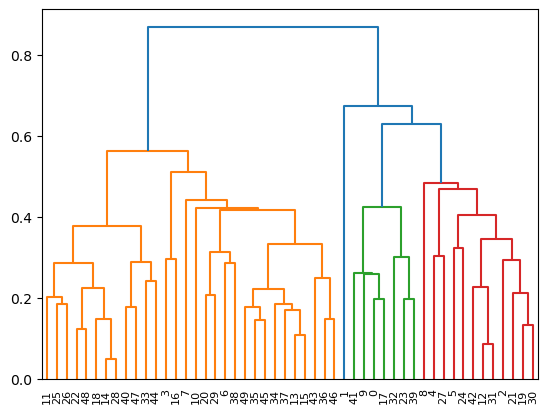

In [8]:
dendrogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [9]:
# create clusters
cl = AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='complete')
cl

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=3)

In [10]:
y_cl = cl.fit_predict(df_norm)

C:\Users\chowd\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [11]:
y_cl

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0,
       1, 0, 0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       2, 1, 1, 2, 1, 1], dtype=int64)

In [12]:
crimes['h_clusterd']=cl.labels_

In [13]:
crimes

Unnamed: 0  Murder  Assault  UrbanPop  Rape  h_clusterd
0          Alabama    13.2      236        58  21.2           0
1           Alaska    10.0      263        48  44.5           0
2          Arizona     8.1      294        80  31.0           0
3         Arkansas     8.8      190        50  19.5           1
4       California     9.0      276        91  40.6           0
5         Colorado     7.9      204        78  38.7           0
6      Connecticut     3.3      110        77  11.1           1
7         Delaware     5.9      238        72  15.8           1
8          Florida    15.4      335        80  31.9           0
9          Georgia    17.4      211        60  25.8           0
10          Hawaii     5.3       46        83  20.2           1
11           Idaho     2.6      120        54  14.2           2
12        Illinois    10.4      249        83  24.0           0
13         Indiana     7.2      113        65  21.0           1
14            Iowa     2.2       56        57  11.3           2
15          Kansas     6.0      115        66  18.0           1
16        Kentucky     9.7      109        52  16.3           1
17       Louisiana    15.4      249        66  22.2           0
18           Maine     2.1       83        51   7.8           2
19        Maryland    11.3      300        67  27.8           0
20   Massachusetts     4.4      149        85  16.3           1
21        Michigan    12.1      255        74  35.1           0
22       Minnesota     2.7       72        66  14.9           1
23     Mississippi    16.1      259        44  17.1           0
24        Missouri     9.0      178        70  28.2           0
25         Montana     6.0      109        53  16.4           2
26        Nebraska     4.3      102        62  16.5           2
27          Nevada    12.2      252        81  46.0           0
28   New Hampshire     2.1       57        56   9.5           2
29      New Jersey     7.4      159        89  18.8           1
30      New Mexico    11.4      285        70  32.1           0
31        New York    11.1      254        86  26.1           0
32  North Carolina    13.0      337        45  16.1           0
33    North Dakota     0.8       45        44   7.3           2
34            Ohio     7.3      120        75  21.4           1
35        Oklahoma     6.6      151        68  20.0           1
36          Oregon     4.9      159        67  29.3           1
37    Pennsylvania     6.3      106        72  14.9           1
38    Rhode Island     3.4      174        87   8.3           1
39  South Carolina    14.4      279        48  22.5           0
40    South Dakota     3.8       86        45  12.8           2
41       Tennessee    13.2      188        59  26.9           0
42           Texas    12.7      201        80  25.5           0
43            Utah     3.2      120        80  22.9           1
44         Vermont     2.2       48        32  11.2           2
45        Virginia     8.5      156        63  20.7           1
46      Washington     4.0      145        73  26.2           1
47   West Virginia     5.7       81        39   9.3           2
48       Wisconsin     2.6       53        66  10.8           1
49         Wyoming     6.8      161        60  15.6           1

#  K Means

In [14]:
#import libraries
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [15]:
crimes1 = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/clustering/crime_data.csv')
crimes1.head()

Unnamed: 0  Murder  Assault  UrbanPop  Rape
0     Alabama    13.2      236        58  21.2
1      Alaska    10.0      263        48  44.5
2     Arizona     8.1      294        80  31.0
3    Arkansas     8.8      190        50  19.5
4  California     9.0      276        91  40.6

In [16]:
# Normalized dara function
def norm_func(i):
    x=(i-i.min())/(i.max()-i.min())
    return(x)

In [17]:
df_norm = norm_func(crimes.iloc[:,1:])

C:\Users\chowd\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chowd\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\chowd\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chowd\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known t

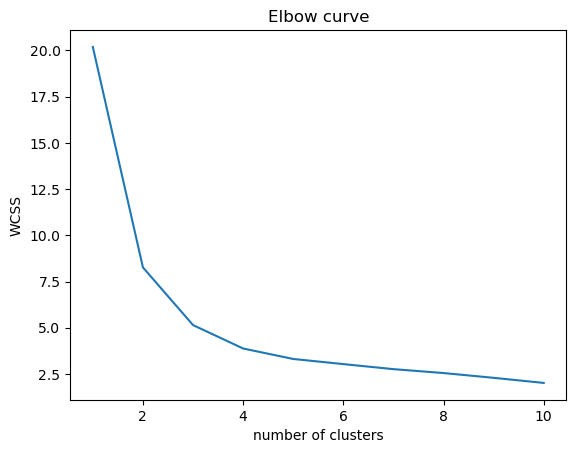

In [18]:
# Elbow curve
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df_norm)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [19]:
# Selecting 4 clusters from above plot
model=KMeans(n_clusters=4)
model.fit(df_norm)
model.labels_

C:\Users\chowd\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\chowd\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       0, 3, 1, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 0, 0])

In [20]:
x=pd.Series(model.labels_)
crimes1['Cluster']=x

In [21]:
crimes1

Unnamed: 0  Murder  Assault  UrbanPop  Rape  Cluster
0          Alabama    13.2      236        58  21.2        3
1           Alaska    10.0      263        48  44.5        1
2          Arizona     8.1      294        80  31.0        1
3         Arkansas     8.8      190        50  19.5        0
4       California     9.0      276        91  40.6        1
5         Colorado     7.9      204        78  38.7        1
6      Connecticut     3.3      110        77  11.1        0
7         Delaware     5.9      238        72  15.8        0
8          Florida    15.4      335        80  31.9        1
9          Georgia    17.4      211        60  25.8        3
10          Hawaii     5.3       46        83  20.2        0
11           Idaho     2.6      120        54  14.2        2
12        Illinois    10.4      249        83  24.0        1
13         Indiana     7.2      113        65  21.0        0
14            Iowa     2.2       56        57  11.3        2
15          Kansas     6.0      115        66  18.0        0
16        Kentucky     9.7      109        52  16.3        0
17       Louisiana    15.4      249        66  22.2        3
18           Maine     2.1       83        51   7.8        2
19        Maryland    11.3      300        67  27.8        1
20   Massachusetts     4.4      149        85  16.3        0
21        Michigan    12.1      255        74  35.1        1
22       Minnesota     2.7       72        66  14.9        0
23     Mississippi    16.1      259        44  17.1        3
24        Missouri     9.0      178        70  28.2        1
25         Montana     6.0      109        53  16.4        2
26        Nebraska     4.3      102        62  16.5        2
27          Nevada    12.2      252        81  46.0        1
28   New Hampshire     2.1       57        56   9.5        2
29      New Jersey     7.4      159        89  18.8        0
30      New Mexico    11.4      285        70  32.1        1
31        New York    11.1      254        86  26.1        1
32  North Carolina    13.0      337        45  16.1        3
33    North Dakota     0.8       45        44   7.3        2
34            Ohio     7.3      120        75  21.4        0
35        Oklahoma     6.6      151        68  20.0        0
36          Oregon     4.9      159        67  29.3        0
37    Pennsylvania     6.3      106        72  14.9        0
38    Rhode Island     3.4      174        87   8.3        0
39  South Carolina    14.4      279        48  22.5        3
40    South Dakota     3.8       86        45  12.8        2
41       Tennessee    13.2      188        59  26.9        3
42           Texas    12.7      201        80  25.5        1
43            Utah     3.2      120        80  22.9        0
44         Vermont     2.2       48        32  11.2        2
45        Virginia     8.5      156        63  20.7        0
46      Washington     4.0      145        73  26.2        0
47   West Virginia     5.7       81        39   9.3        2
48       Wisconsin     2.6       53        66  10.8        0
49         Wyoming     6.8      161        60  15.6        0

In [22]:
crimes1.iloc[:,1:5].groupby(crimes1.Cluster).mean()

Murder     Assault   UrbanPop       Rape
Cluster                                             
0         5.715000  132.300000  70.800000  18.100000
1        10.815385  257.384615  76.000000  33.192308
2         3.180000   78.700000  49.300000  11.630000
3        14.671429  251.285714  54.285714  21.685714

# DBSCAN

In [23]:
#import libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [24]:
crimes2 = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/clustering/crime_data.csv')

In [25]:
crimes2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [27]:
df=crimes2.iloc[:,1:5]

In [28]:
df.values

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [29]:
stscaler=StandardScaler().fit(df.values)
x=stscaler.transform(df.values)

In [30]:
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [31]:
dbscan=DBSCAN(eps=2,min_samples=5)
dbscan.fit(x)

DBSCAN(eps=2)

In [32]:
dbscan.labels_

array([ 0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

In [33]:
dl=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [34]:
dl

cluster
0         0
1        -1
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0

In [35]:
pd.concat([crimes2,dl],axis=1)

Unnamed: 0  Murder  Assault  UrbanPop  Rape  cluster
0          Alabama    13.2      236        58  21.2        0
1           Alaska    10.0      263        48  44.5       -1
2          Arizona     8.1      294        80  31.0        0
3         Arkansas     8.8      190        50  19.5        0
4       California     9.0      276        91  40.6        0
5         Colorado     7.9      204        78  38.7        0
6      Connecticut     3.3      110        77  11.1        0
7         Delaware     5.9      238        72  15.8        0
8          Florida    15.4      335        80  31.9        0
9          Georgia    17.4      211        60  25.8        0
10          Hawaii     5.3       46        83  20.2        0
11           Idaho     2.6      120        54  14.2        0
12        Illinois    10.4      249        83  24.0        0
13         Indiana     7.2      113        65  21.0        0
14            Iowa     2.2       56        57  11.3        0
15          Kansas     6.0      115        66  18.0        0
16        Kentucky     9.7      109        52  16.3        0
17       Louisiana    15.4      249        66  22.2        0
18           Maine     2.1       83        51   7.8        0
19        Maryland    11.3      300        67  27.8        0
20   Massachusetts     4.4      149        85  16.3        0
21        Michigan    12.1      255        74  35.1        0
22       Minnesota     2.7       72        66  14.9        0
23     Mississippi    16.1      259        44  17.1        0
24        Missouri     9.0      178        70  28.2        0
25         Montana     6.0      109        53  16.4        0
26        Nebraska     4.3      102        62  16.5        0
27          Nevada    12.2      252        81  46.0        0
28   New Hampshire     2.1       57        56   9.5        0
29      New Jersey     7.4      159        89  18.8        0
30      New Mexico    11.4      285        70  32.1        0
31        New York    11.1      254        86  26.1        0
32  North Carolina    13.0      337        45  16.1        0
33    North Dakota     0.8       45        44   7.3        0
34            Ohio     7.3      120        75  21.4        0
35        Oklahoma     6.6      151        68  20.0        0
36          Oregon     4.9      159        67  29.3        0
37    Pennsylvania     6.3      106        72  14.9        0
38    Rhode Island     3.4      174        87   8.3        0
39  South Carolina    14.4      279        48  22.5        0
40    South Dakota     3.8       86        45  12.8        0
41       Tennessee    13.2      188        59  26.9        0
42           Texas    12.7      201        80  25.5        0
43            Utah     3.2      120        80  22.9        0
44         Vermont     2.2       48        32  11.2        0
45        Virginia     8.5      156        63  20.7        0
46      Washington     4.0      145        73  26.2        0
47   West Virginia     5.7       81        39   9.3        0
48       Wisconsin     2.6       53        66  10.8        0
49         Wyoming     6.8      161        60  15.6        0

# Question 2

# Perform clustering (hierarchical,K means clustering and DBSCAN) for the airlines data to obtain optimum number of clusters. 

Draw the inferences from the clusters obtained.

Data Description:
 
The file EastWestAirlinescontains information on passengers who belong to an airline’s frequent flier program. For each passenger the data include information on their mileage history and on different ways they accrued or spent miles in the last year. The goal is to try to identify clusters of passengers that have similar characteristics for the purpose of targeting different segments for different types of mileage offers

ID --Unique ID

Balance--Number of miles eligible for award travel

Qual_mile--Number of miles counted as qualifying for Topflight status

cc1_miles -- Number of miles earned with freq. flyer credit card in the past 12 months:
cc2_miles -- Number of miles earned with Rewards credit card in the past 12 months:
cc3_miles -- Number of miles earned with Small Business credit card in the past 12 months:

1 = under 5,000
2 = 5,000 - 10,000
3 = 10,001 - 25,000
4 = 25,001 - 50,000
5 = over 50,000

Bonus_miles--Number of miles earned from non-flight bonus transactions in the past 12 months

Bonus_trans--Number of non-flight bonus transactions in the past 12 months

Flight_miles_12mo--Number of flight miles in the past 12 months

Flight_trans_12--Number of flight transactions in the past 12 months

Days_since_enrolled--Number of days since enrolled in flier program

Award--whether that person had award flight (free flight) or not

In [37]:
!pip install yellowbrick

     ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
     ---- -------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
     ------------ ------------------------ 92.2/282.6 kB 751.6 kB/s eta 0:00:01
     -------------- --------------------- 112.6/282.6 kB 726.2 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/282.6 kB 711.9 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/282.6 kB 711.9 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/282.6 kB 711.9 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/282.6 kB 711.9 kB/s eta 0:00:01
     ------------------ ----------------- 143.4/282.6 kB 711.9 kB/s eta 0:00:01
     ---------------------------- ------- 225.3/282.6 kB 492.1 kB/s eta 0:00:01
     ------------------------------- ---- 245.8/282.6 kB 486.6 kB/s eta 0:00:01
     ------------------------------------ 282.6/282.6

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score as sil, calinski_harabasz_score as chs, silhouette_samples
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Data Display customization

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 1)

In [3]:
# Import dataset
data = pd.read_excel('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/clustering/EastWestAirlines.xlsx',sheet_name='data')

# Column rename
data.rename(columns={'ID#':'ID','Award?':'Award'}, inplace=True)

#Set ID as Index column
data.set_index('ID',inplace=True)
data

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                        
1     28143    0           1          1          1          174           
2     19244    0           1          1          1          215           
3     41354    0           1          1          1          4123          
4     14776    0           1          1          1          500           
5     97752    0           4          1          1          43300         
...     ...   ..          ..         ..         ..          ...           
4017  18476    0           1          1          1          8525          
4018  64385    0           1          1          1          981           
4019  73597    0           3          1          1          25447         
4020  54899    0           1          1          1          500           
4021  3016     0           1          1          1          0             

      Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  \
ID                                                                         
1     1            0                  0                7000                
2     2            0                  0                6968                
3     4            0                  0                7034                
4     1            0                  0                6952                
5     26           2077               4                6935                
...  ..           ..                 ..                 ...                
4017  4            200                1                1403                
4018  5            0                  0                1395                
4019  8            0                  0                1402                
4020  1            500                1                1401                
4021  0            0                  0                1398                

      Award  
ID           
1     0      
2     0      
3     0      
4     0      
5     1      
...  ..      
4017  1      
4018  1      
4019  1      
4020  0      
4021  0      

[3999 rows x 11 columns]

In [4]:
# Data Exploration
data.describe() # Descriptive Statistics

Balance    Qual_miles    cc1_miles    cc2_miles    cc3_miles  \
count  3.999000e+03  3999.000000   3999.000000  3999.000000  3999.000000   
mean   7.360133e+04  144.114529    2.059515     1.014504     1.012253      
std    1.007757e+05  773.663804    1.376919     0.147650     0.195241      
min    0.000000e+00  0.000000      1.000000     1.000000     1.000000      
25%    1.852750e+04  0.000000      1.000000     1.000000     1.000000      
50%    4.309700e+04  0.000000      1.000000     1.000000     1.000000      
75%    9.240400e+04  0.000000      3.000000     1.000000     1.000000      
max    1.704838e+06  11148.000000  5.000000     3.000000     5.000000      

         Bonus_miles  Bonus_trans  Flight_miles_12mo  Flight_trans_12  \
count  3999.000000    3999.00000   3999.000000        3999.000000       
mean   17144.846212   11.60190     460.055764         1.373593          
std    24150.967826   9.60381      1400.209171        3.793172          
min    0.000000       0.00000      0.000000           0.000000          
25%    1250.000000    3.00000      0.000000           0.000000          
50%    7171.000000    12.00000     0.000000           0.000000          
75%    23800.500000   17.00000     311.000000         1.000000          
max    263685.000000  86.00000     30817.000000       53.000000         

       Days_since_enroll        Award  
count  3999.00000         3999.000000  
mean   4118.55939         0.370343     
std    2065.13454         0.482957     
min    2.00000            0.000000     
25%    2330.00000         0.000000     
50%    4096.00000         0.000000     
75%    5790.50000         1.000000     
max    8296.00000         1.000000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 1 to 4021
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award              3999 non-null   int64
dtypes: int64(11)
memory usage: 374.9 KB


In [6]:
# different cc_miles have different max values.
# sp, we want to check what values these columns can take

print('unique_cc1',data.cc1_miles.unique())
print('unique_cc1',data.cc2_miles.unique())
print('unique_cc1',data.cc3_miles.unique())

unique_cc1 [1 4 3 2 5]
unique_cc1 [1 2 3]
unique_cc1 [1 3 2 4 5]


In [7]:
# As a part of the data cleansing we need to check the data for any missing/ no values
# null count for columns

null_count_col = data.isnull().sum().value_counts(ascending=False)

# null percentage for columns

null_percent_col = (data.isnull().sum() * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n",null_count_col,"\n")
print("Null Percentage for Columns:\n\n",null_percent_col)

Null Count for Columns:

 0    11
Name: count, dtype: int64 

Null Percentage for Columns:

 0.0    11
Name: count, dtype: int64


In [11]:
# null count for rows

null_count_row = data.isnull().sum(axis=1).value_counts(ascending=False)

# null percentage for rows

null_percent_row = (data.isnull().sum(axis=1) * 100 / len(data)).value_counts(ascending=False)

print("Null Count for Columns:\n\n",null_count_row,"\n")
print("Null Percentage for Rows:\n\n",null_percent_row)

Null Count for Columns:

 0    3999
Name: count, dtype: int64 

Null Percentage for Rows:

 0.0    3999
Name: count, dtype: int64


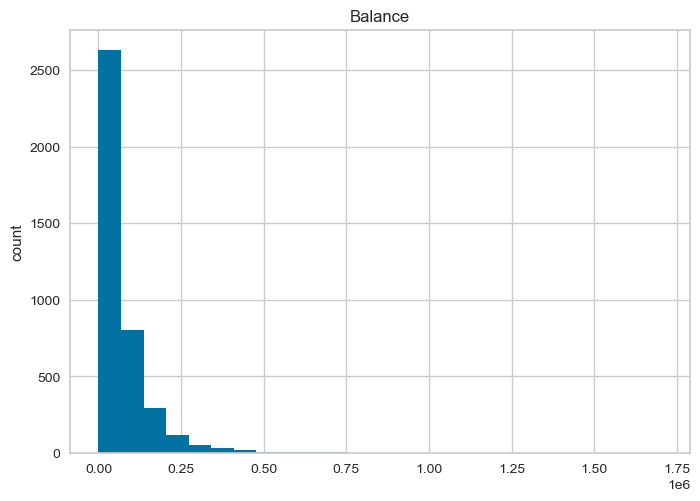

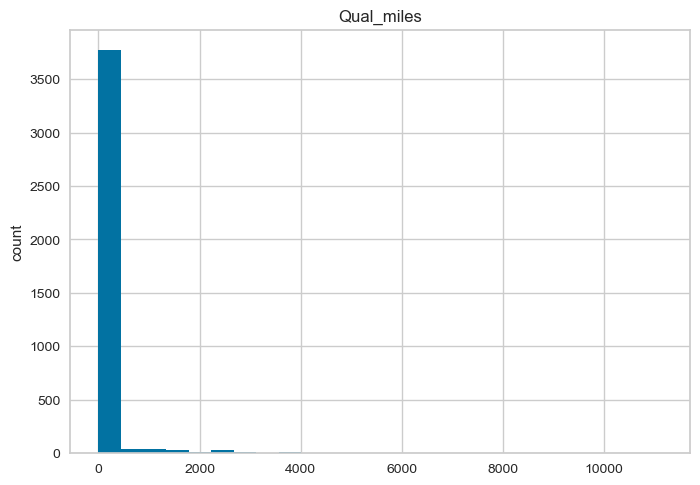

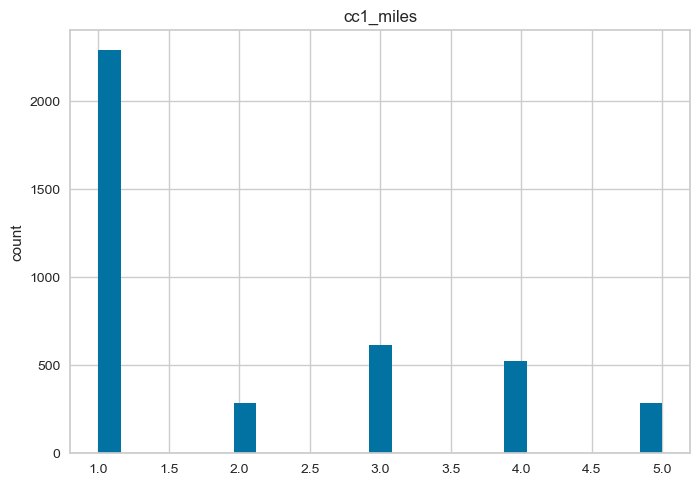

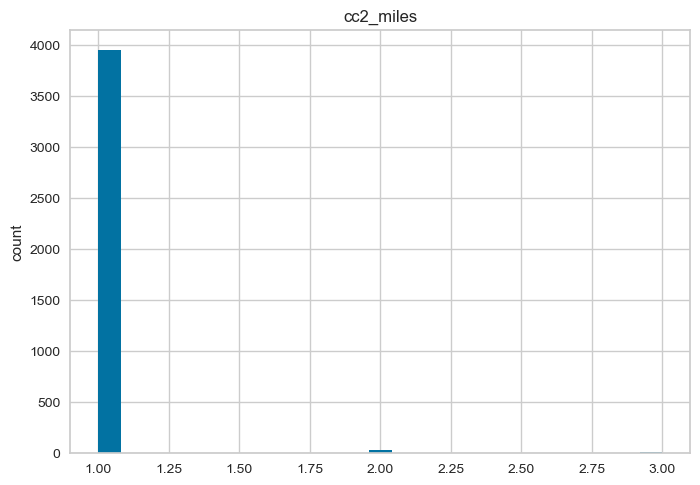

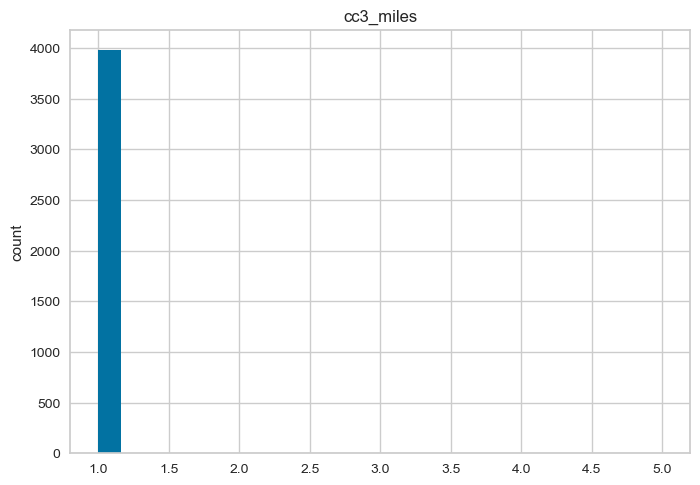

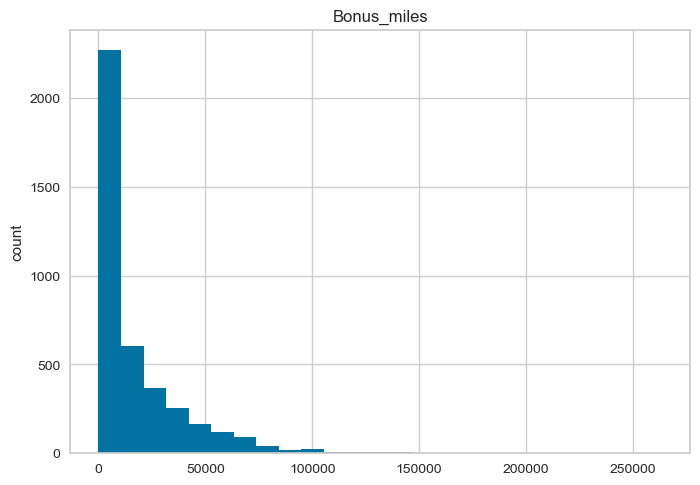

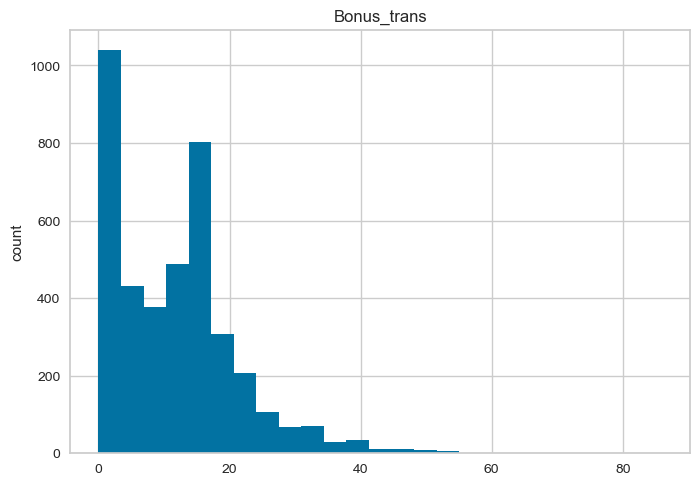

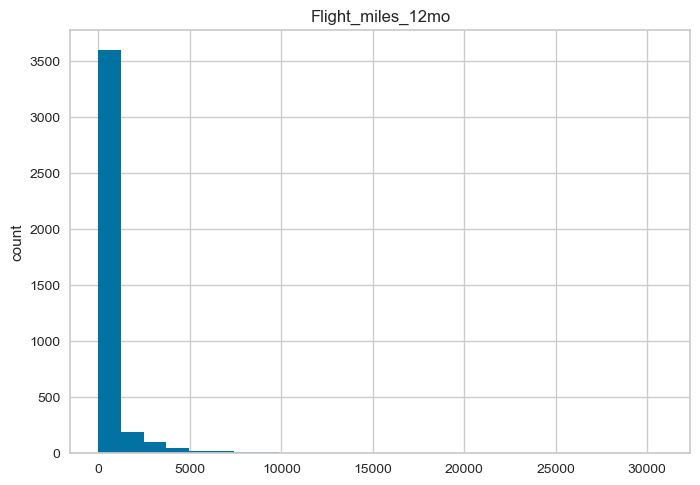

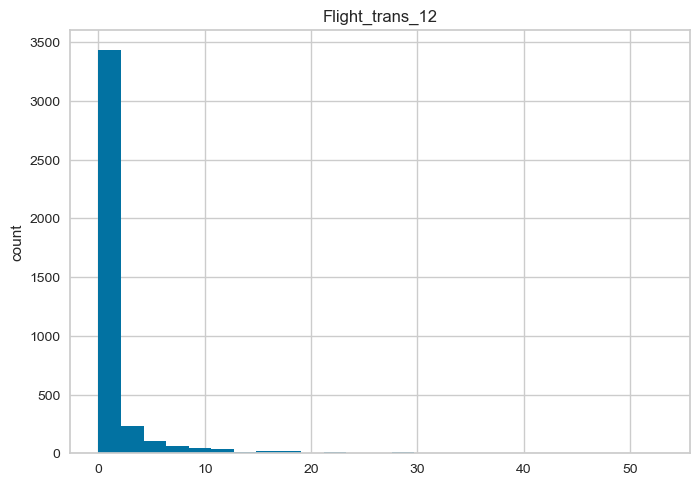

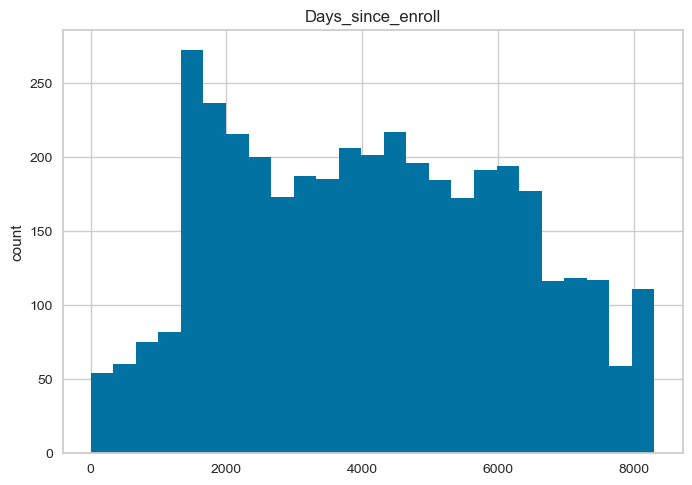

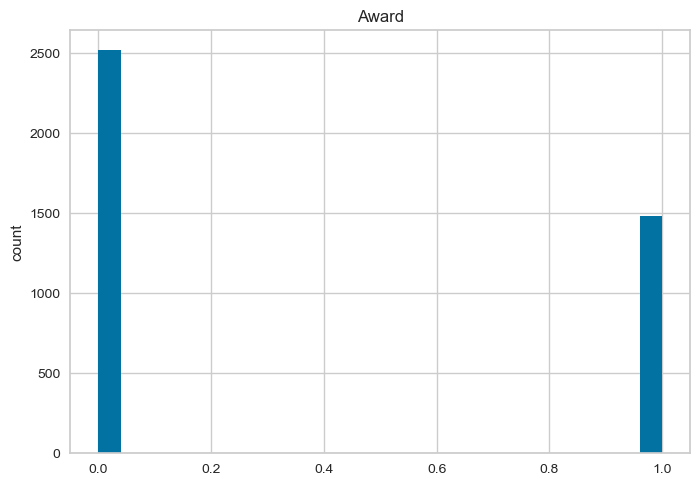

In [20]:
# Exploratory Data Analysis

for feature in data.columns:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.ylabel('count')
    plt.title(feature)
    plt.show()

Balance


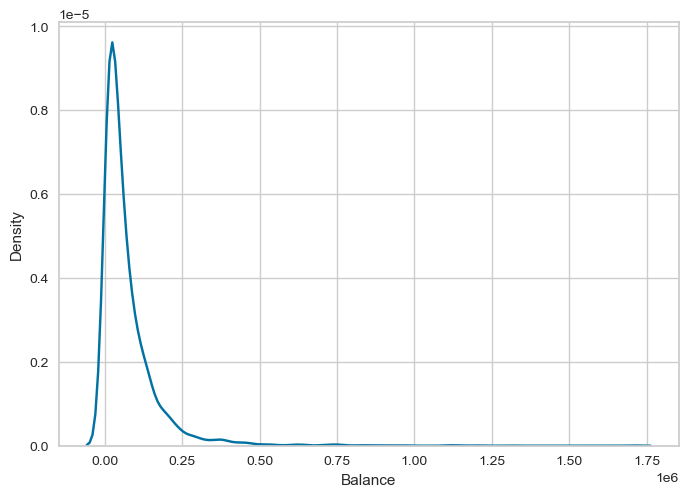

Qual_miles


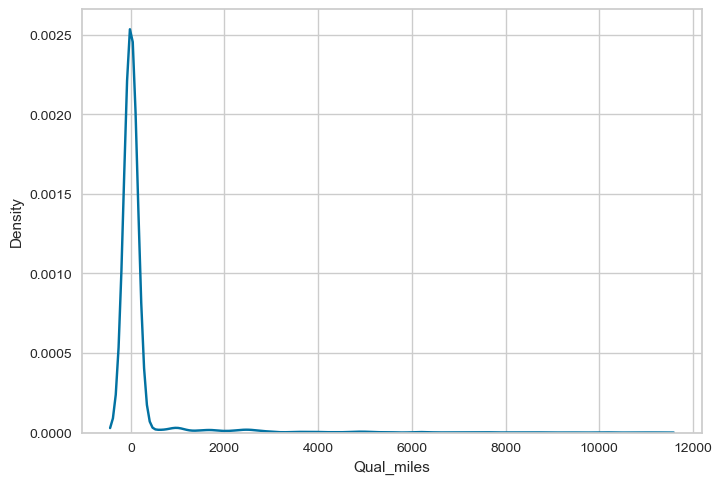

cc1_miles


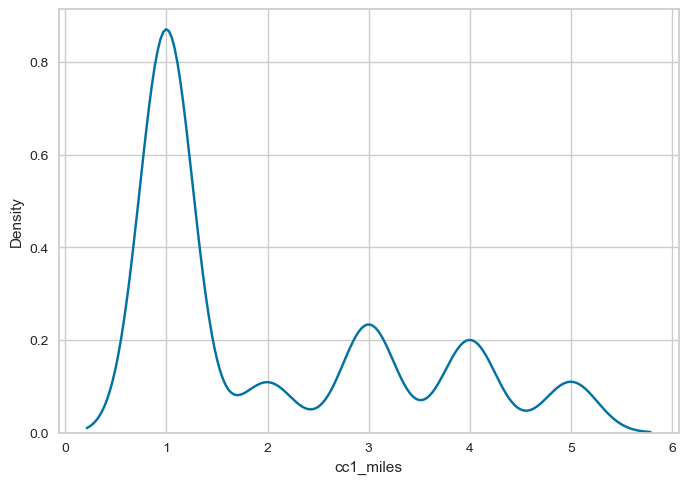

cc2_miles


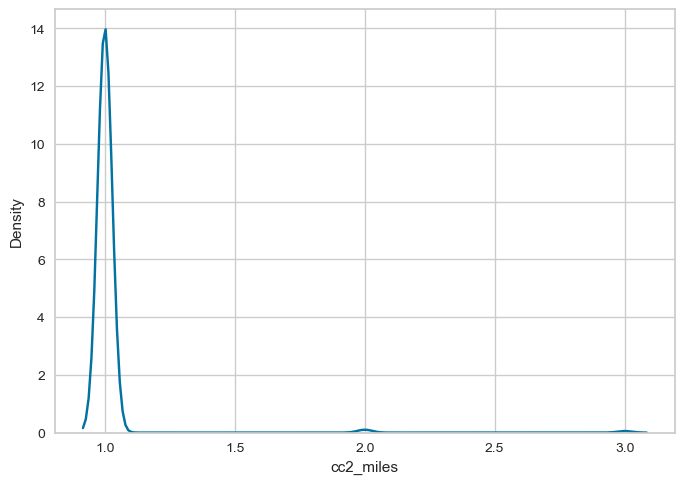

cc3_miles


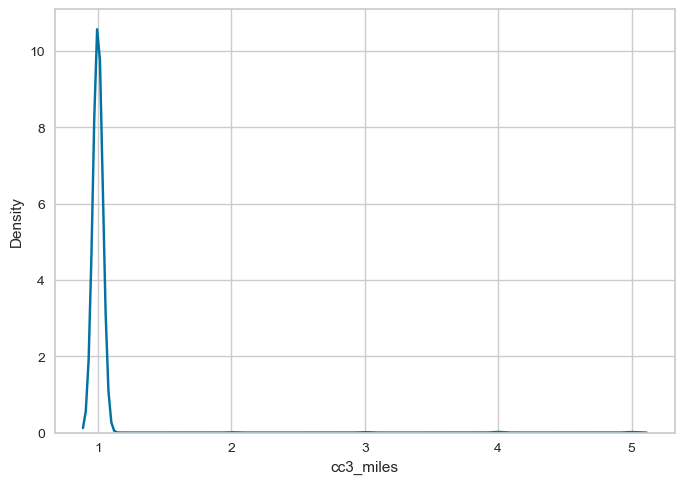

Bonus_miles


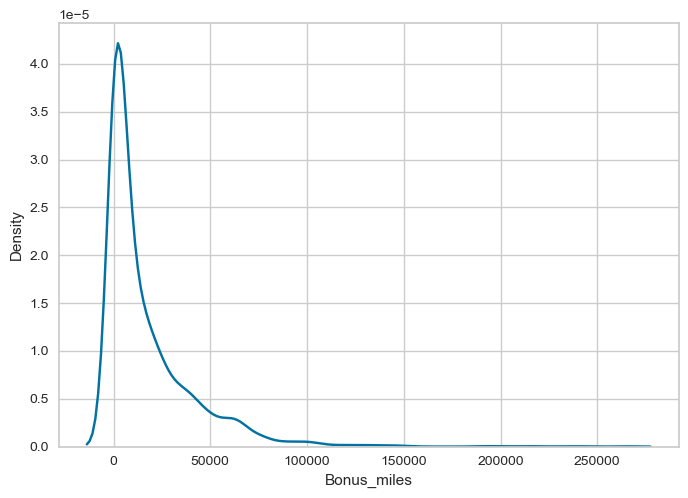

Bonus_trans


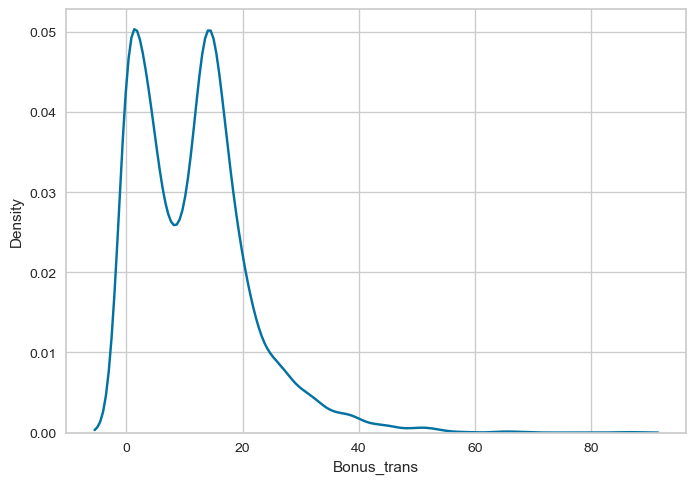

Flight_miles_12mo


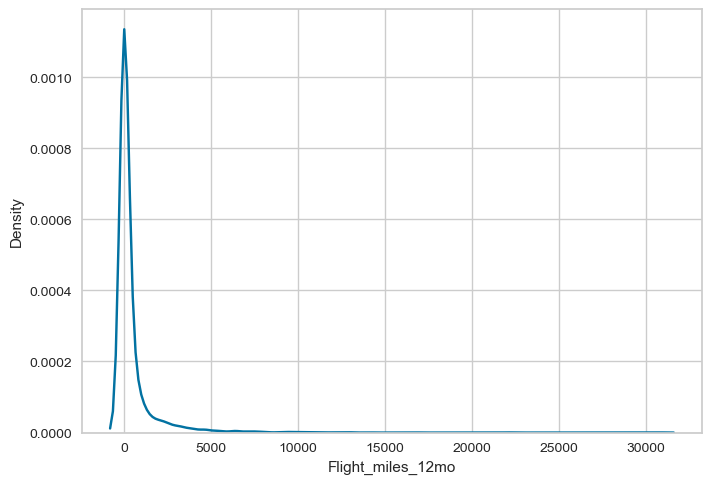

Flight_trans_12


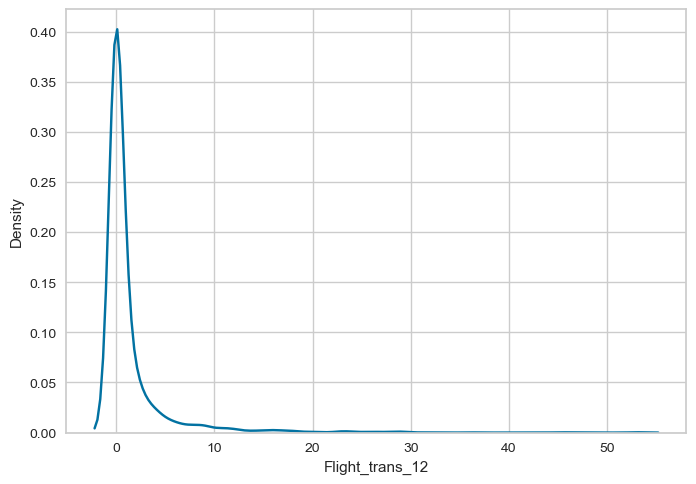

Days_since_enroll


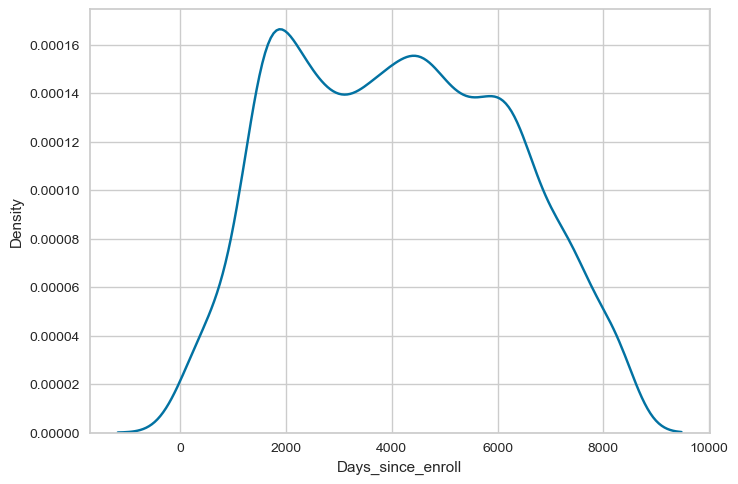

Award


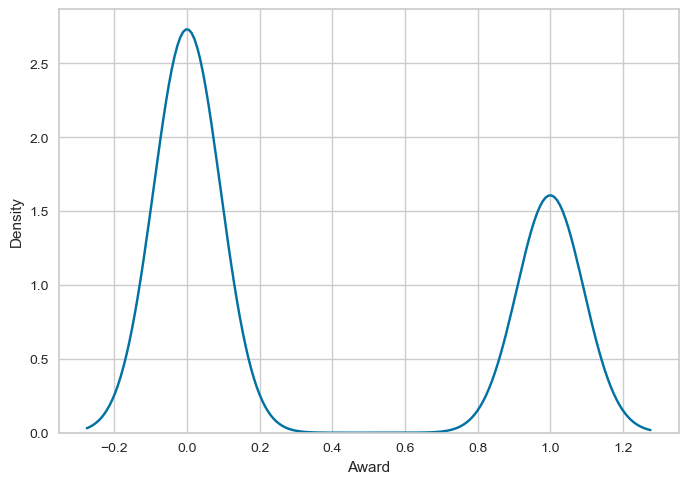

In [21]:
# Kernal Density for every feature, singled out

for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

In [22]:
# Outliers Detection
data.columns

Index(['Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award'],
      dtype='object')

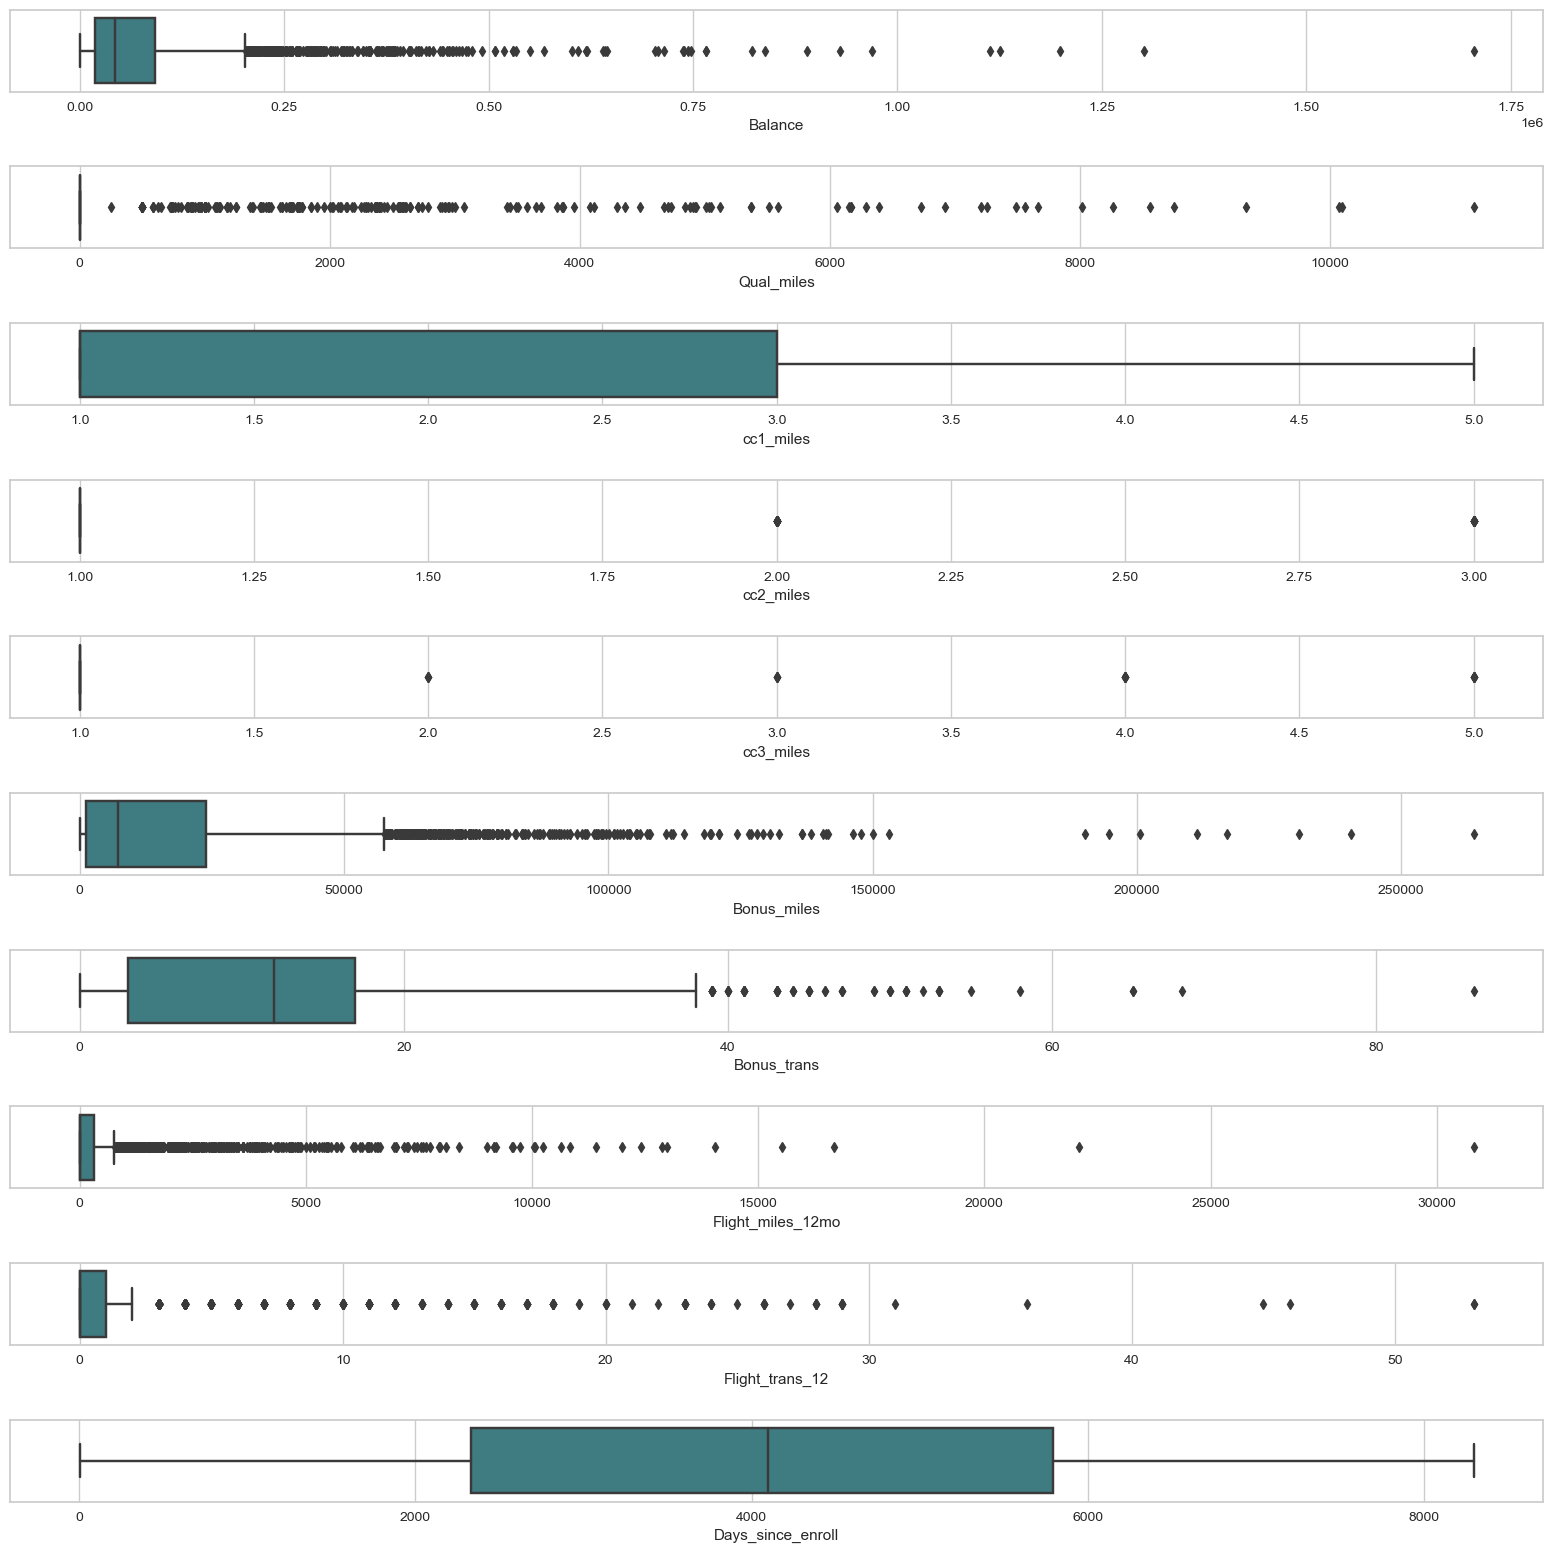

In [23]:
ot=data.copy() 
fig, axes=plt.subplots(10,1,figsize=(16,16),sharex=False,sharey=False)
sns.boxplot(x='Balance',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='Qual_miles',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='cc1_miles',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='cc2_miles',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='cc3_miles',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Bonus_miles',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Bonus_trans',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Flight_miles_12mo',data=ot,palette='crest',ax=axes[7])
sns.boxplot(x='Flight_trans_12',data=ot,palette='crest',ax=axes[8])
sns.boxplot(x='Days_since_enroll',data=ot,palette='crest',ax=axes[9])
plt.tight_layout(pad=2.0)

<Axes: >

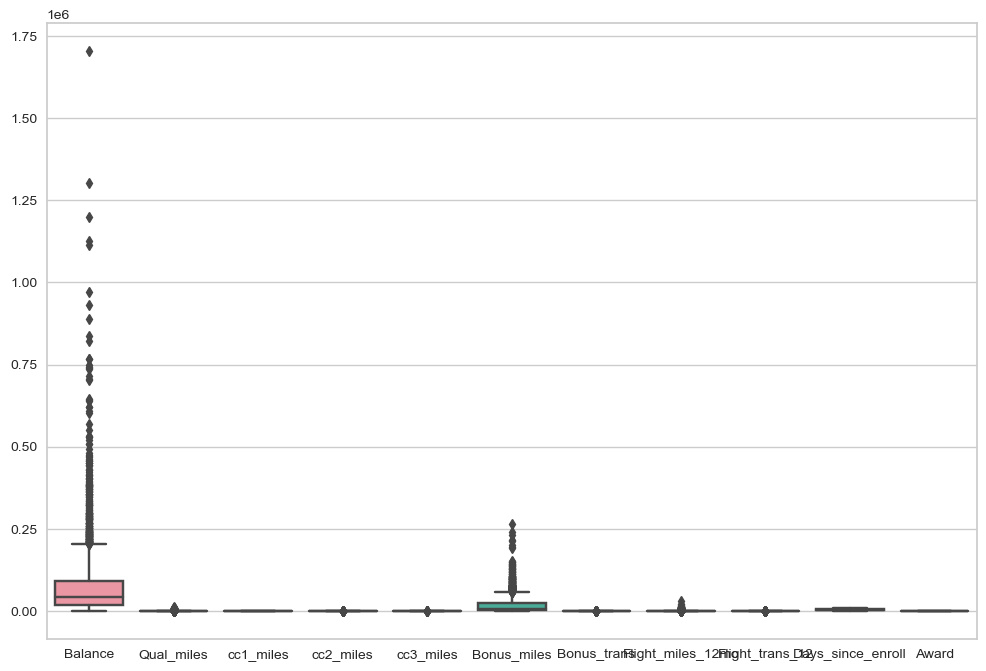

In [24]:
# Box plot for every feature in the same graph

plt.figure(figsize=(12,8))
sns.boxplot(data=data)

<Axes: >

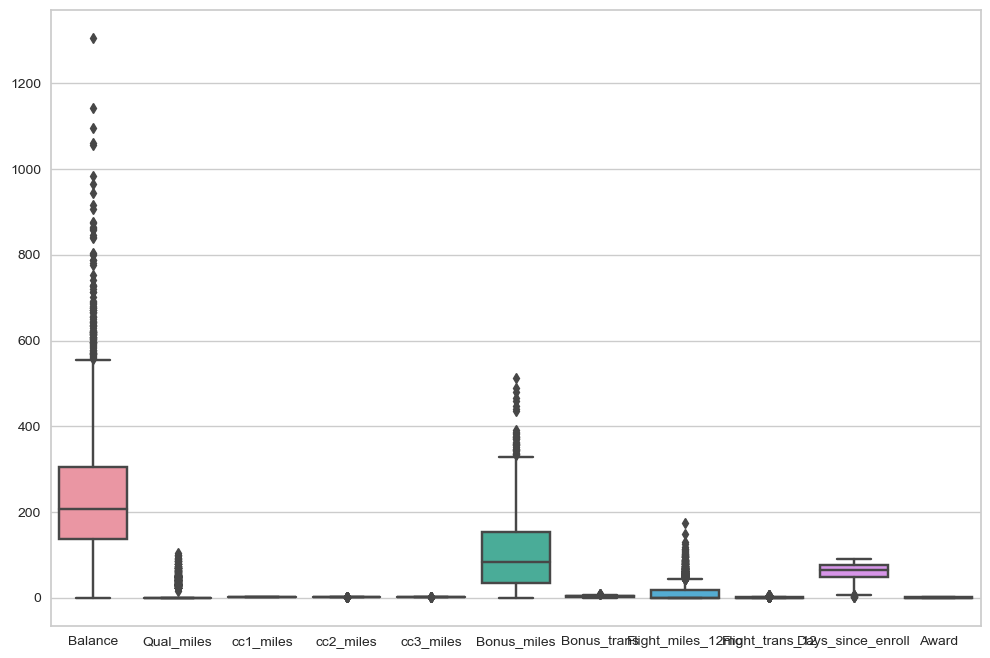

In [25]:
# we use sqrt() to see more clearly despite the outliers

plt.figure(figsize=(12,8))
sns.boxplot(data=np.sqrt(data))

In [26]:
# Data Visualization
countNotermdeposit = len(data[data.Award == 0])
counthavetermdeposit = len(data[data.Award == 1])
print("Percentage of Customer doesn't have a Award: {:.2f}%".format((countNotermdeposit / (len(data.Award))*100)))
print("Percentage of Customer does have a Award: {:.2f}%".format((counthavetermdeposit / (len(data.Award))*100)))

Percentage of Customer doesn't have a Award: 62.96%
Percentage of Customer does have a Award: 37.04%


Text(0.5, 1.0, 'Whether the client has a Award or not')

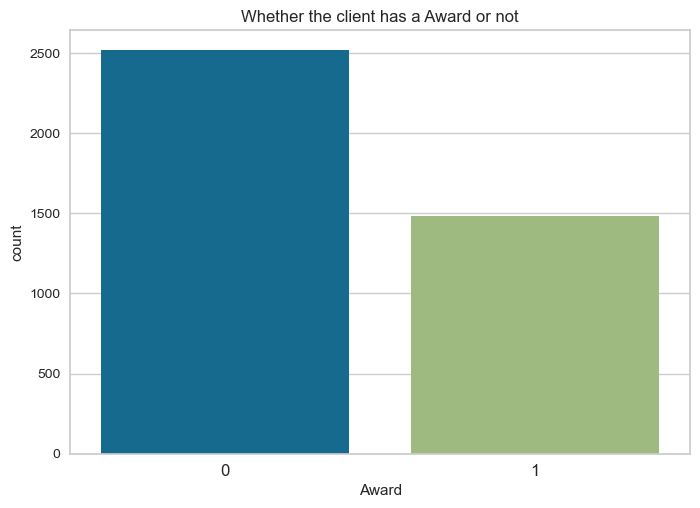

In [28]:
sns.countplot(x='Award', data = data, order = data['Award'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Whether the client has a Award or not')

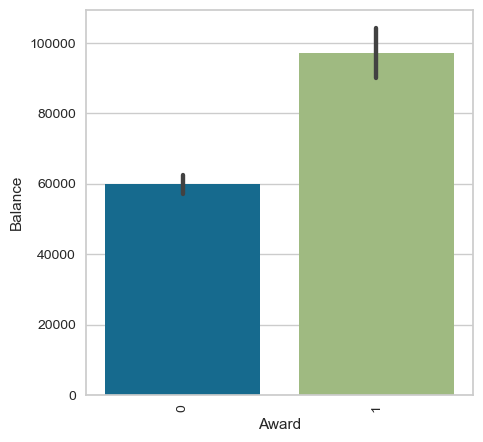

In [29]:
# Balance : Number of miles eligible for award travel

plt.figure(figsize = (5,5))
Balance = data[['Award','Balance']].sort_values('Balance',ascending = False)
ax = sns.barplot(x='Award',y='Balance',data = Balance)
ax.set(xlabel = 'Award', ylabel= 'Balance')
plt.xticks(rotation=90)
plt.show()

In [30]:
# what is correlated with Balance?

corr_matrix = data.corr()
corr_matrix["Balance"].sort_values(ascending=False)

Balance              1.000000
Bonus_miles          0.403410
cc1_miles            0.338252
Bonus_trans          0.324797
Days_since_enroll    0.262975
Flight_trans_12      0.255656
Flight_miles_12mo    0.217509
Award                0.178380
Qual_miles           0.108696
cc3_miles            0.035234
cc2_miles           -0.008822
Name: Balance, dtype: float64

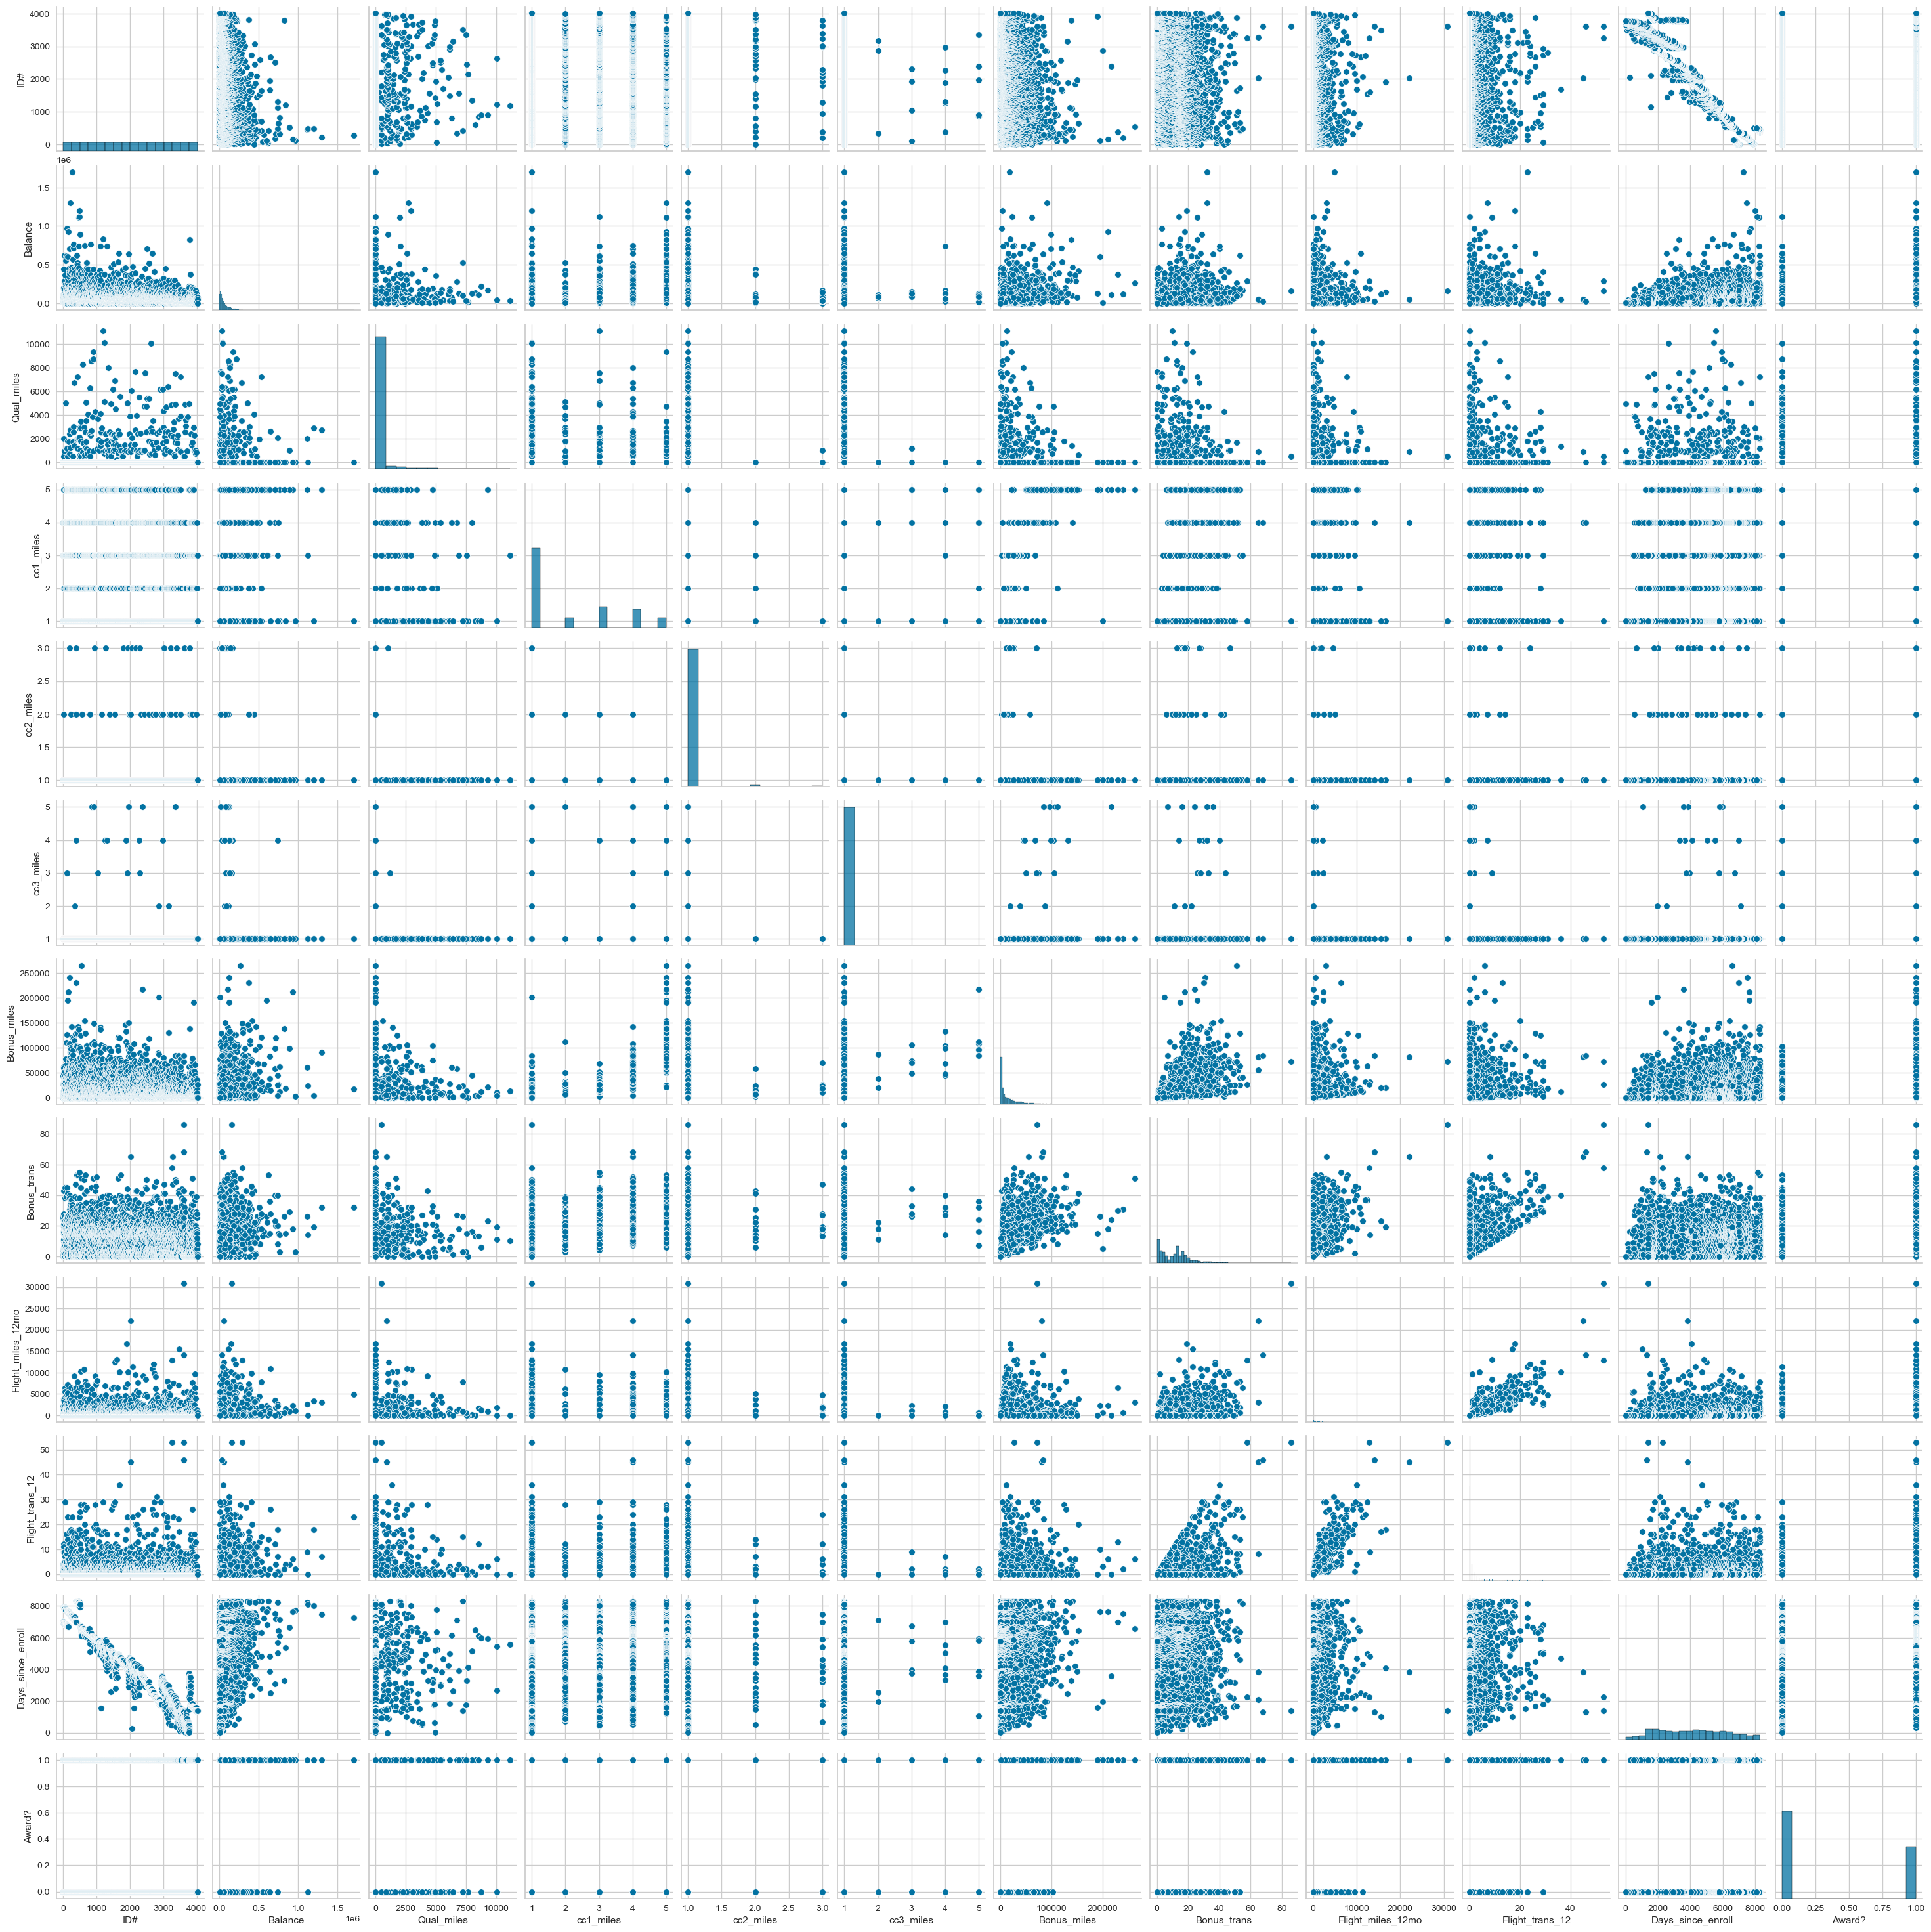

In [31]:
dataset = pd.read_excel('C:/Users/chowd/OneDrive/Desktop/Data Science/Assignments/clustering/EastWestAirlines.xlsx',sheet_name='data')
sns.pairplot(dataset)

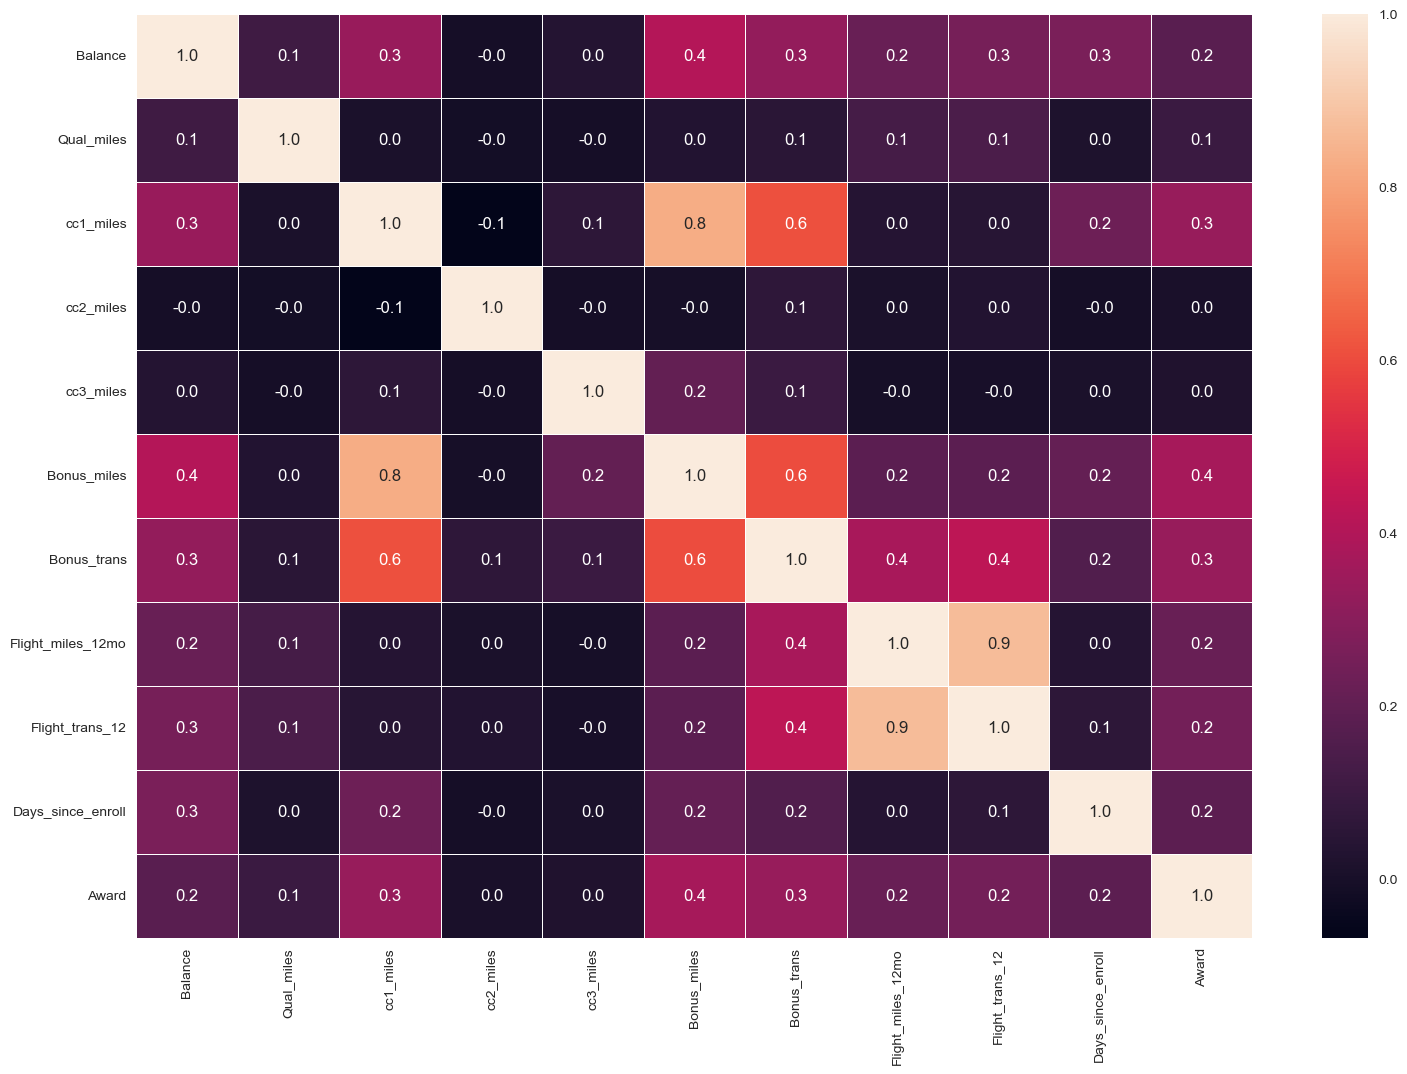

In [32]:
# correlation heatmap

f,ax = plt.subplots(figsize=(18,12))
sns.heatmap(data.corr(), annot=True, linewidths =.5, fmt ='.1f',ax=ax)
plt.show()

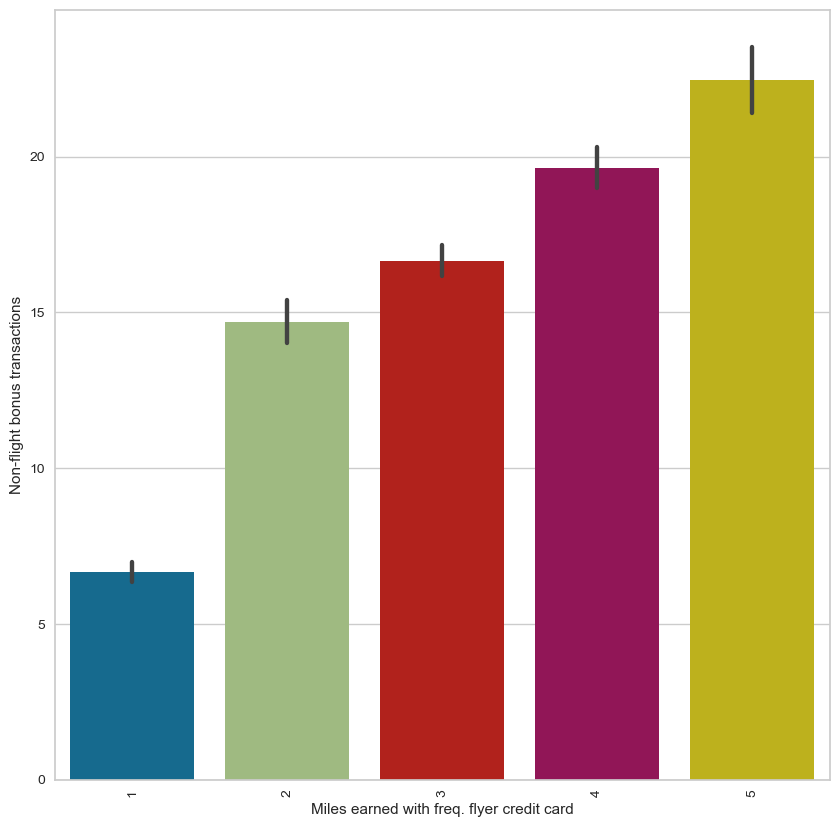

In [33]:
# Plotting frequent flying bonuses vs non-flight bonus transactions
plt.figure(figsize = (10,10))
sorted_data = data[['cc1_miles','Bonus_trans']].sort_values('Bonus_trans',ascending = False)
ax = sns.barplot(x='cc1_miles',y='Bonus_trans',data= sorted_data)
ax.set(xlabel = 'Miles earned with freq. flyer credit card', ylabel = 'Non-flight bonus transactions')
plt.xticks(rotation=90)
plt.show()

In [39]:
# Data Preprocessing
# Standardizing the Data

standard_scaler = StandardScaler()
std_df = standard_scaler.fit_transform(data)
std_df.shape

(3998, 11)

In [40]:
# Using Minmaxscaler for accuracy result comparison

from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

minmax_df = minmax.fit_transform(data)
minmax_df.shape

(3998, 11)

# KMeans Clustering

In [41]:
# Elbow Method for Determining Cluster Amount
cluster_range = range(1,15)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,n_init=10)
    clusters.fit(std_df)
    labels = clusters.labels_
    centroids = clusters.cluster_centers_
    cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame({"num_clusters":cluster_range,"cluster_errors":cluster_errors})
clusters_df

num_clusters  cluster_errors
0   1             43978.000000  
1   2             35402.348376  
2   3             30893.140330  
3   4             27149.157953  
4   5             24539.006523  
5   6             21466.993679  
6   7             19409.515776  
7   8             17314.499688  
8   9             16040.784442  
9   10            14730.424428  
10  11            13704.081407  
11  12            12946.200057  
12  13            12426.651033  
13  14            11969.881277

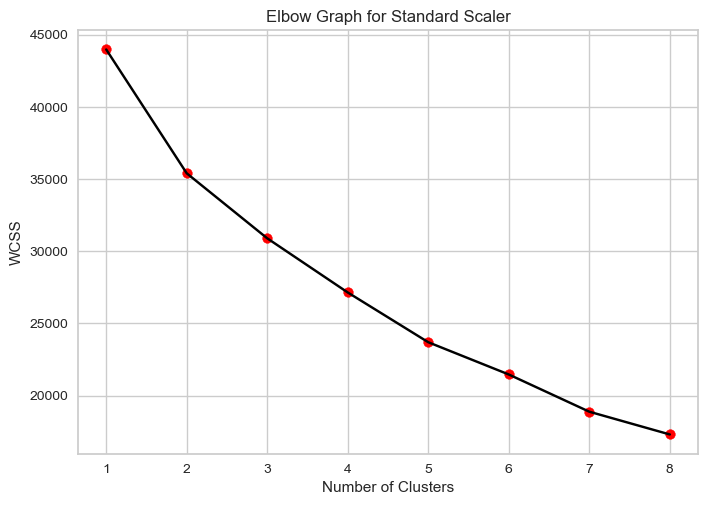

In [42]:
wcss=[]
for i in range(1,9):
    kmeans=KMeans(n_clusters=i,random_state=2)
    kmeans.fit(std_df)
    wcss.append(kmeans.inertia_)
    
# Plot K Values range vs WCSS to get Elbow graph for choosin K (no.of clusters)
plt.plot(range(1,9),wcss,color='black')
plt.scatter(range(1,9),wcss,color='red')
plt.title('Elbow Graph for Standard Scaler')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [57]:
# Selecting 4 clusters from above plot
model=KMeans(n_clusters=4)
model.fit(std_df)
model.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [58]:
x=pd.Series(clusters.labels_)
data['Cluster']=x

In [60]:
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Cluster  
ID           
1   1.0      
2   1.0      
3   1.0      
4   0.0      
5   1.0

In [62]:
data.iloc[:,1:5].groupby(data.Cluster).mean()

Qual_miles  cc1_miles  cc2_miles  cc3_miles
Cluster                                             
0.0      146.741071  2.410714   1.008929   1.008929 
1.0      219.206667  2.264000   1.017333   1.013333 
2.0      316.210526  2.605263   1.000000   1.000000 
3.0      0.000000    2.400000   1.000000   1.000000 
4.0      171.268293  1.463415   1.000000   1.000000 
5.0      97.037406   1.930175   1.022444   1.024938 
6.0      70.813559   2.084746   1.000000   1.000000 
7.0      134.259048  2.194286   1.011429   1.020952 
8.0      118.315789  2.097166   1.020243   1.008097 
9.0      68.640000   1.940000   1.000000   1.000000 
10.0     76.052288   2.098039   1.000000   1.000000 
11.0     148.323775  1.694146   1.019116   1.005974 
12.0     128.659631  2.197889   1.005277   1.018470 
13.0     0.000000    1.500000   1.000000   1.000000

# Hierarchical Clustering

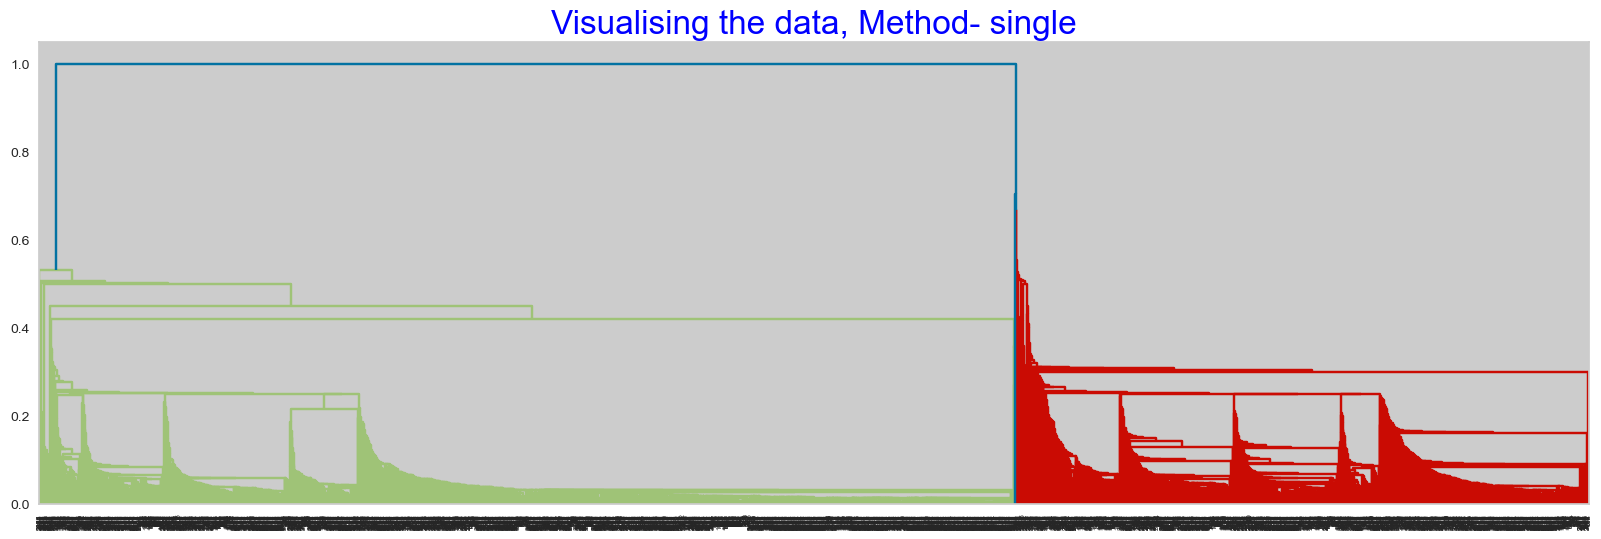

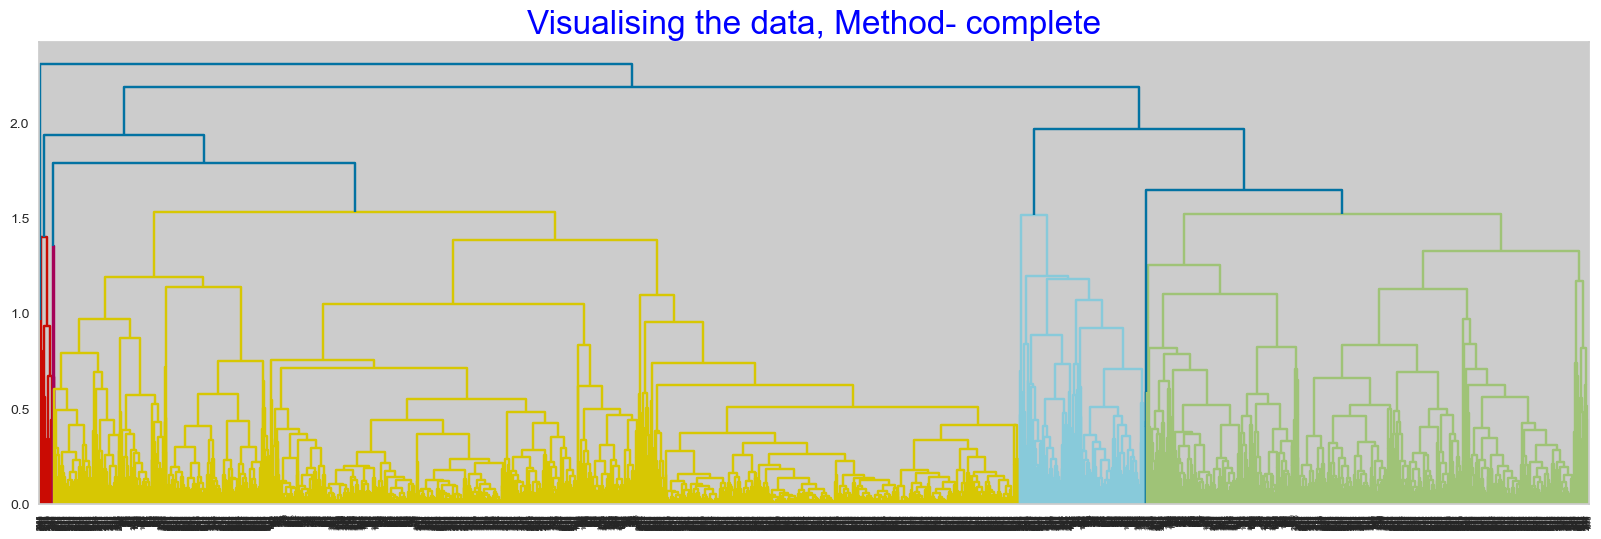

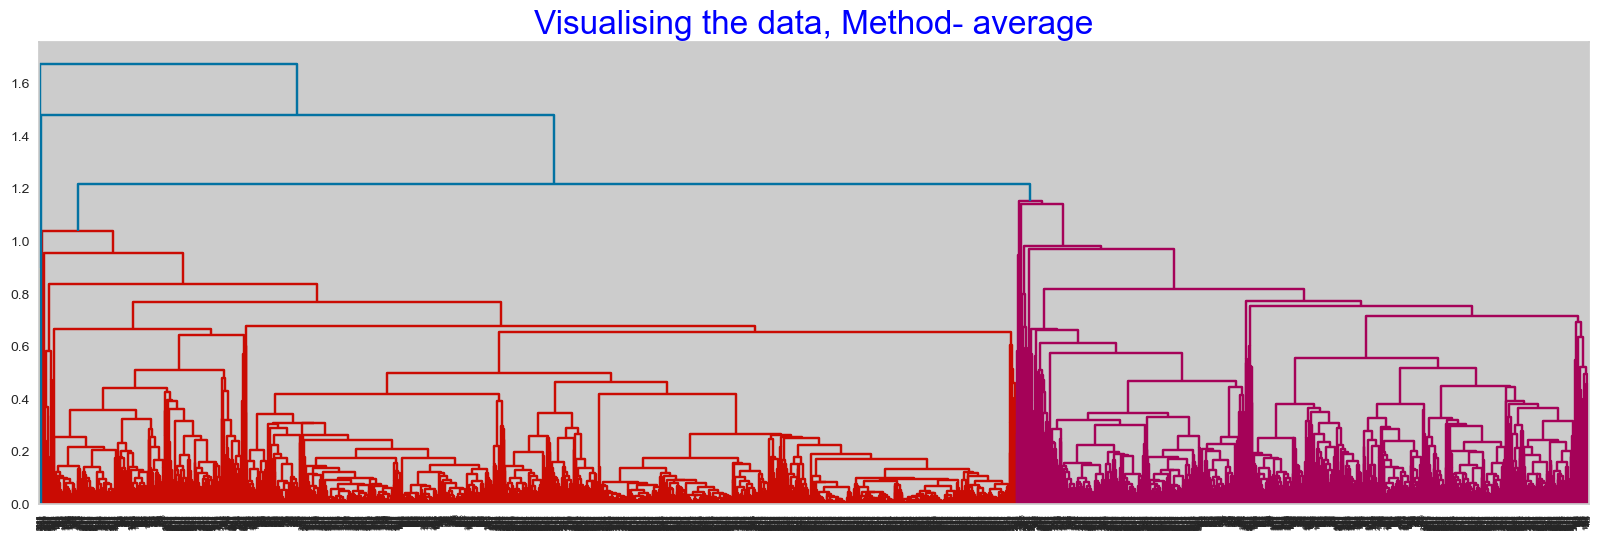

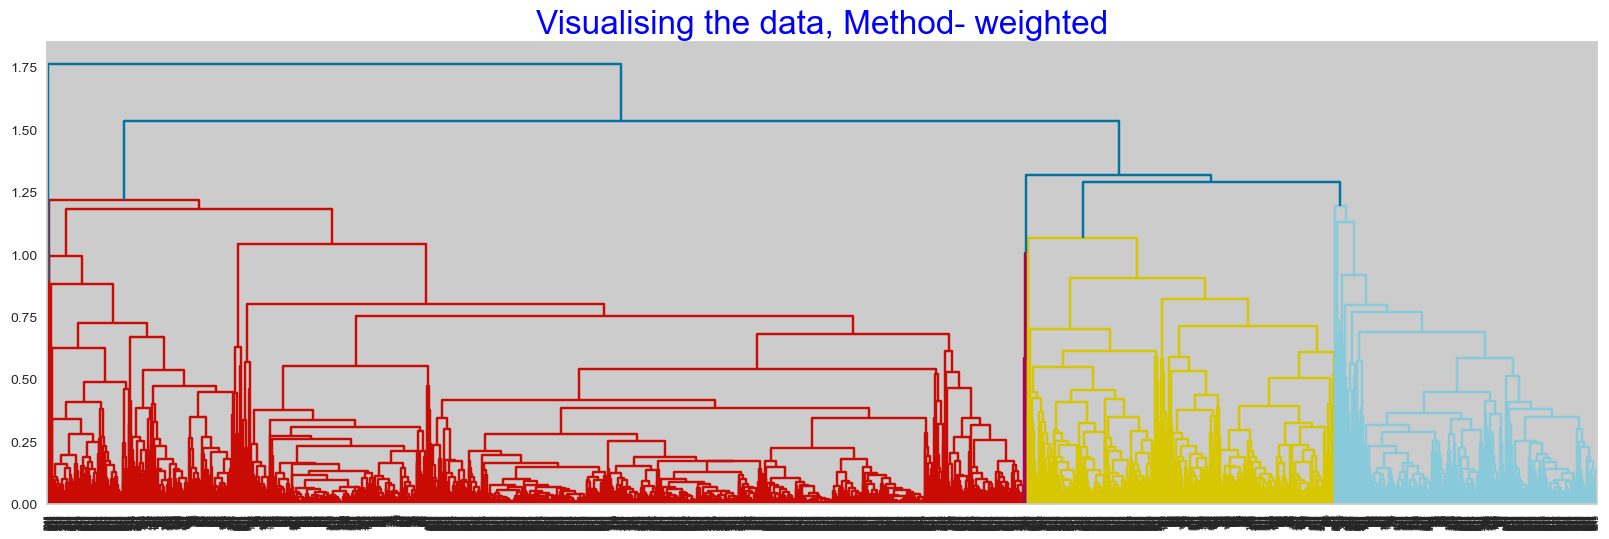

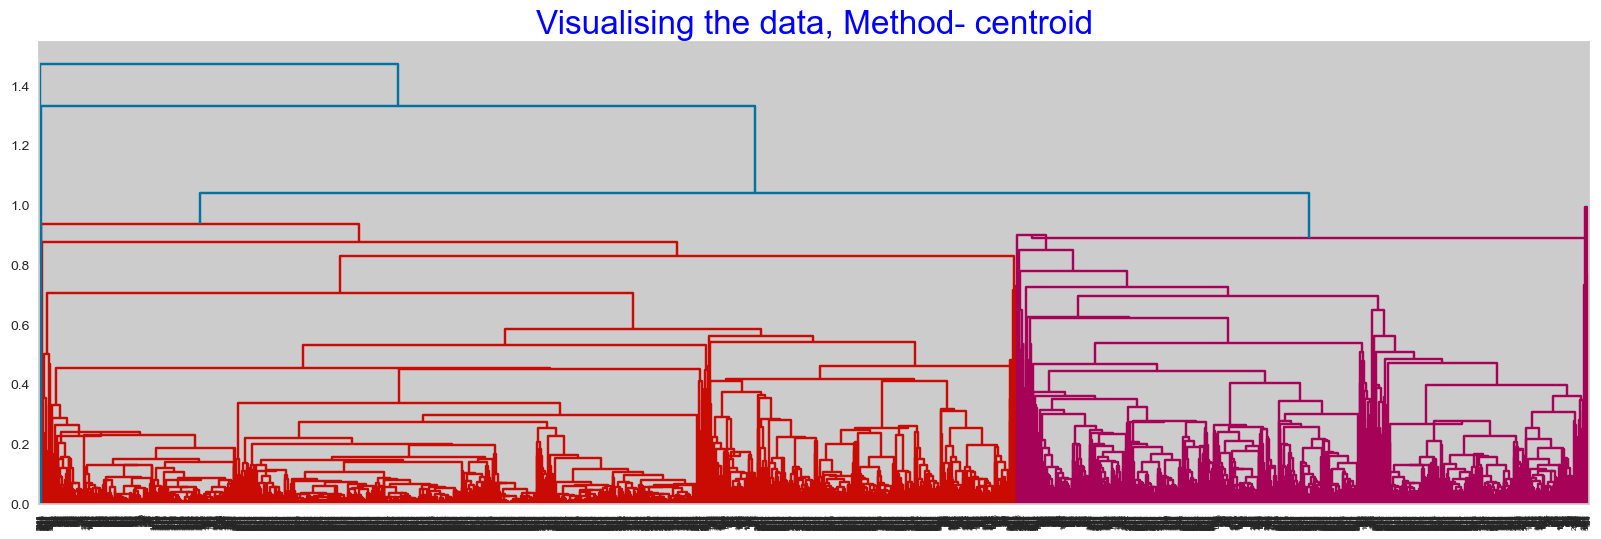

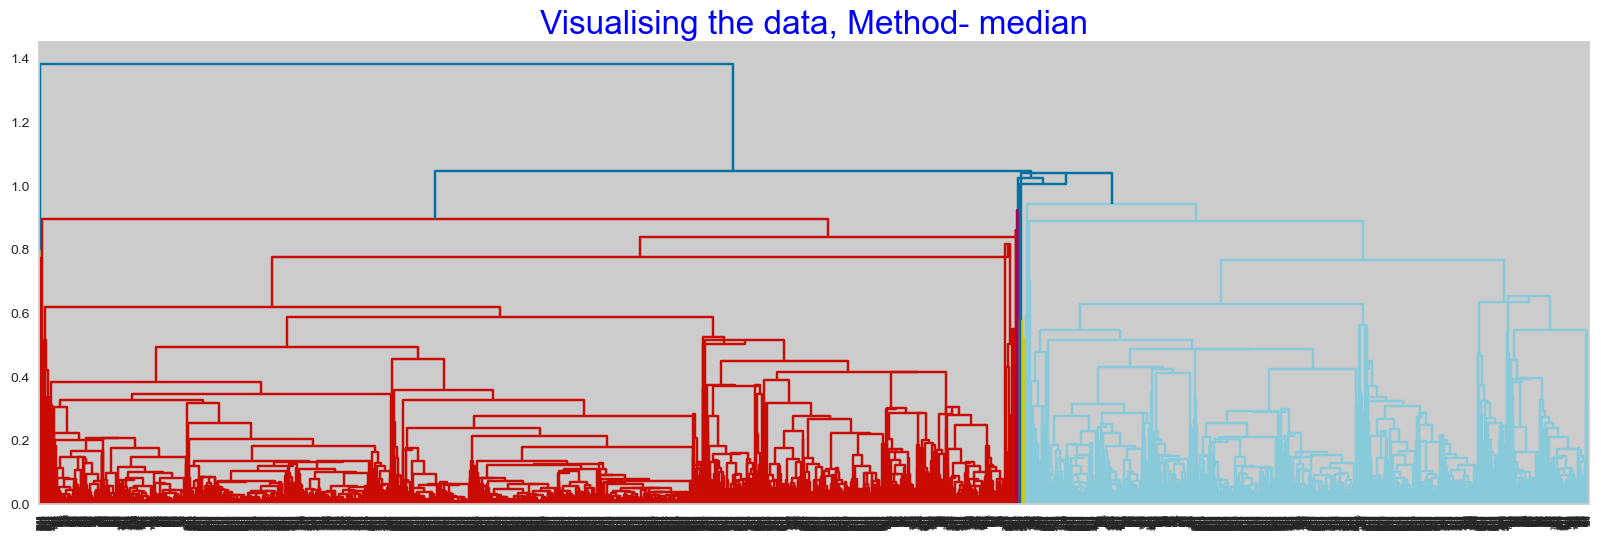

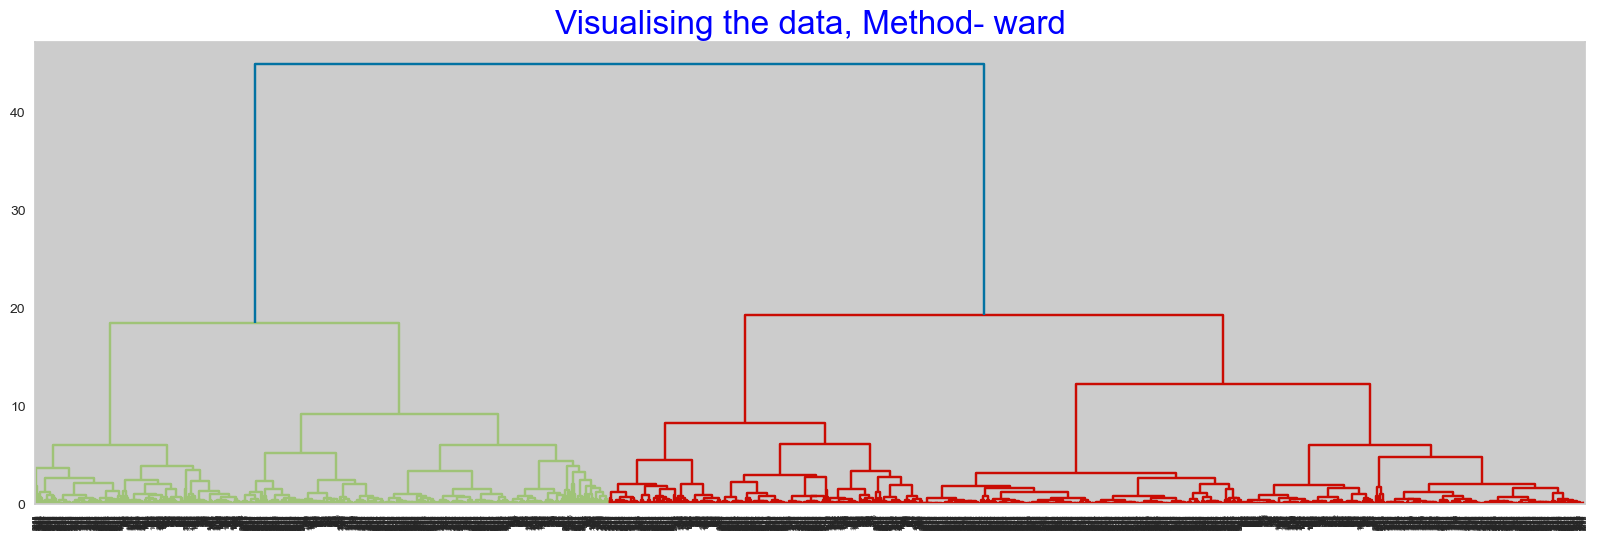

In [63]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(minmax_df, method = methods,optimal_ordering=False))

In [64]:
n_clusters = [2,3,4,5,6,7,8]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(minmax_df)
        silhouette_score1 = sil(minmax_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.535888544052936
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- average : 0.4703657329091562
For n_clusters = 2 The average silhouette_score with linkage- single : 0.535888544052936

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.4354523188194701
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.5318364582439801
For n_clusters = 3 The average silhouette_score with linkage- average : 0.3961439228235289
For n_clusters = 3 The average silhouette_score with linkage- single : 0.5351186081149816

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.42489181550394106
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.4645451427805366
For n_clusters = 4 The average silhouette_score with linkage- average : 0.5285595526639542
For n_

Conclusion - Max score is with cluster number 2 in standard scalar transformation and in Min Max scaler transformation.

In [65]:
# PCA
# Running PCA of standardized data
# applying PCA on std_df

# we are considering 95% variance in n_components to not loose any data.

from sklearn.decomposition import PCA
pca_std = PCA(random_state=10, n_components=0.95)
pca_std_df= pca_std.fit_transform(std_df)


In [66]:
#eigenvalues..

print(pca_std.singular_values_)

[114.59929366  83.12095737  64.93711956  63.52257567  61.95910679
  60.39325992  56.7960262   49.8137685   37.95289819]


In [67]:
# Variance containing in each performed PCA

print(pca_std.explained_variance_ratio_*100)

[29.8626543  15.71034052  9.58849765  9.17530952  8.72920759  8.29356916
  7.33500521  5.64239286  3.27532512]


In [69]:
# Cummulative variance ratio..

# this will give an idea of, at how many no. of PCAs, the cummulative addition of variance will give much information

cumu_variance = np.cumsum(pca_std.explained_variance_ratio_*100)
cumu_variance

array([29.8626543 , 45.57299482, 55.16149247, 64.33680198, 73.06600957,
       81.35957873, 88.69458394, 94.3369768 , 97.61230192])

Conclusion: 
    By applying PCA on standardized data with 95% variance it gives 9 PCA components.

In [70]:
# Silhouette Score method for PCA standard Scaled Data

n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(pca_std_df)
        silhouette_score1 = sil(pca_std_df, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()


For n_clusters = 2 The average silhouette_score with linkage- ward : 0.19961390517290717
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.8108617312271154
For n_clusters = 2 The average silhouette_score with linkage- average : 0.8108617312271154
For n_clusters = 2 The average silhouette_score with linkage- single : 0.7383094547145751

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.21104413292128169
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.7783994853820994
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7857918595410374
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7380319163788157

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.21497866326071854
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6685293540610889
For n_clusters = 4 The average silhouette_score with linkage- average : 0.7754426734642428
Fo

In [74]:
# Run Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
y_pred_hie = agg_clustering.fit_predict(pca_std_df)
print(y_pred_hie.shape)
y_pred_hie

(3998,)


array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [75]:
# Cluster numbers

agg_clustering.n_clusters_

2

In [76]:
# Clustering Score
(sil(pca_std_df, agg_clustering.labels_)*100).round(3)

19.961

In [78]:
# Concating Labels with main dataset copy

data['Hierarchical_labels'] = agg_clustering.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Cluster  Hierarchical_labels  
ID                                
1   1.0      1                    
2   1.0      1                    
3   1.0      1                    
4   0.0      1                    
5   1.0      0

In [79]:
data.groupby('Hierarchical_labels').agg(['mean'])

Balance  Qual_miles cc1_miles cc2_miles cc3_miles  \
                              mean        mean      mean      mean      mean   
Hierarchical_labels                                                            
0                    101290.534671  249.525949  2.793284  1.000000  1.021369   
1                    36405.579472   2.434604    1.073314  1.034018  1.000000   

                      Bonus_miles Bonus_trans Flight_miles_12mo  \
                             mean        mean              mean   
Hierarchical_labels                                               
0                    27673.668993  15.607065   720.235063         
1                    2995.024633   6.222287    110.418768         

                    Flight_trans_12 Days_since_enroll     Award   Cluster  
                               mean              mean      mean      mean  
Hierarchical_labels                                                        
0                    2.112952        4581.034889       0.632359  6.408315  
1                    0.380059        3498.069795       0.018182  7.233274

# DBSCAN

In [82]:
from itertools import product

eps_values = np.arange(0.25,3,0.25) # eps values to be investigated
min_samples = np.arange(3,23) # min_samples values to be investigated
DBSCAN_params = list(product(eps_values, min_samples))

In [83]:
no_of_clusters = []
sil_score = []

for p in DBSCAN_params:
    DBS_clustering = DBSCAN(eps=p[0], min_samples=p[1]).fit(std_df)
    no_of_clusters.append(len(np.unique(DBS_clustering.labels_)))
    sil_score.append(silhouette_score(std_df, DBS_clustering.labels_))

A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.


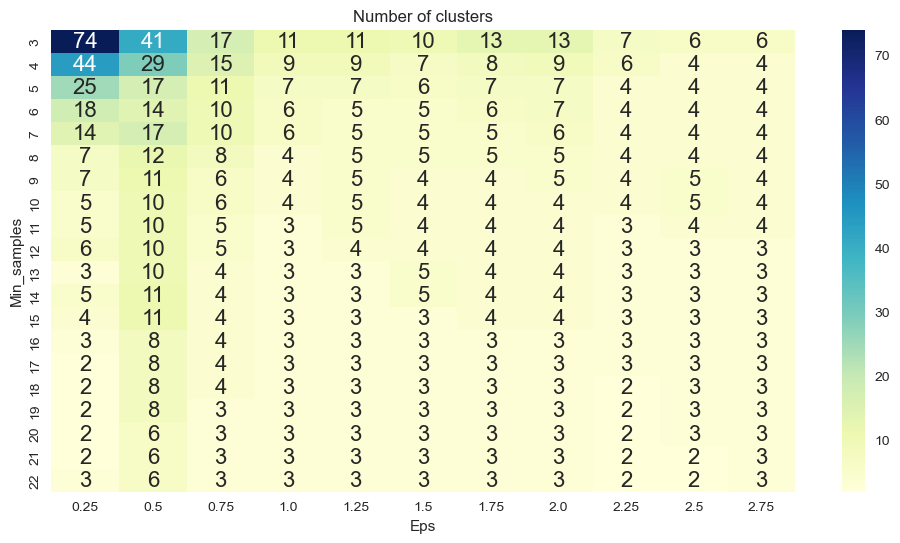

In [84]:
# Collecting number of generated clusters

tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['No_of_clusters'] = no_of_clusters

pivot_1 = pd.pivot_table(tmp, values='No_of_clusters', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(pivot_1, annot=True,annot_kws={"size": 16}, cmap="YlGnBu", ax=ax)
ax.set_title('Number of clusters')
print('A heatplot below shows how many clusters were genreated by the algorithm for the respective parameters combinations.')
plt.show()

As the heatplot above shows, the number of clusters vary from 74 to 2.

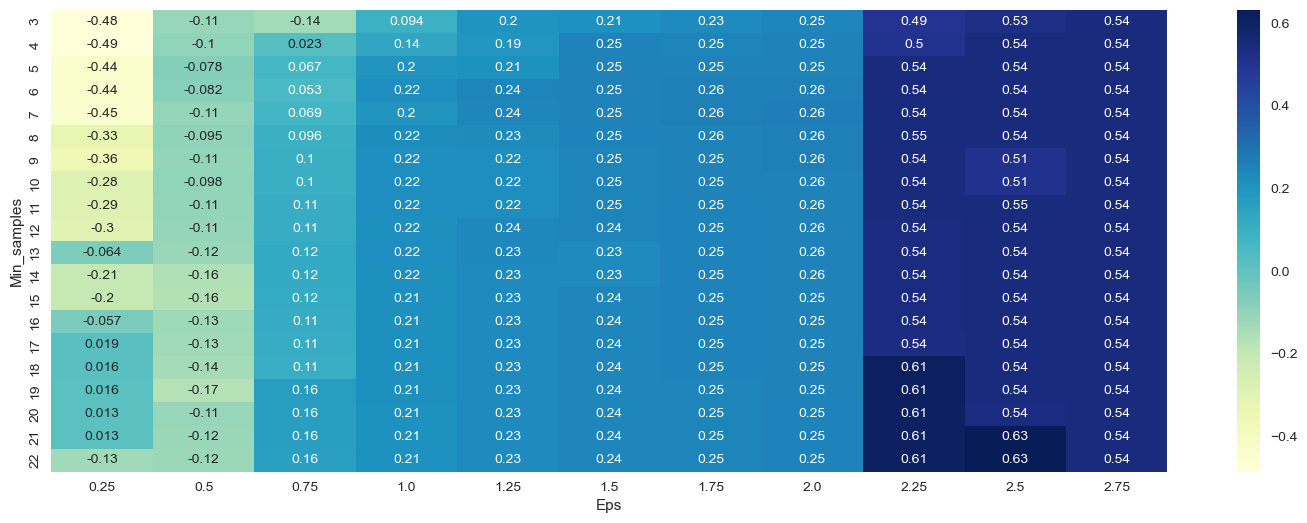

In [85]:
tmp = pd.DataFrame.from_records(DBSCAN_params, columns =['Eps', 'Min_samples'])   
tmp['Sil_score'] = sil_score

pivot_1 = pd.pivot_table(tmp, values='Sil_score', index='Min_samples', columns='Eps')

fig, ax = plt.subplots(figsize=(18,6))
sns.heatmap(pivot_1, annot=True, annot_kws={"size": 10}, cmap="YlGnBu", ax=ax)
plt.show()

Global maximum is 0.63 for eps=2.5 and min_samples= 21 and 22

In [86]:
epsilon = [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75]
min_samples = [3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]


sil_avg = []
max_value = [0,0,0,0]

for i in range(len(epsilon)):
    for j in range(len(min_samples)):

        db = DBSCAN(min_samples = min_samples[j], eps =epsilon[i]).fit(std_df)
        #cluster_labels=dbscan.fit_predict(data) 
        core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
        core_samples_mask[db.core_sample_indices_] = True
        labels = db.labels_

        # Number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise_ = list(labels).count(-1)


        silhouette_avg = sil(std_df, labels)
        if silhouette_avg > max_value[3]:
            max_value=(epsilon[i], min_samples[j], n_clusters_, silhouette_avg)
        sil_avg.append(silhouette_avg)

print("epsilon=", max_value[0], 
      "\nmin_sample=", max_value[1],
      "\nnumber of clusters=", max_value[2],
      "\naverage silhouette score= %.4f" % max_value[3])

epsilon= 2.5 
min_sample= 21 
number of clusters= 1 
average silhouette score= 0.6319


In [87]:
# Run DBSCAN on standard scaled data with optimal min_sample and epsilon values

dbscan = DBSCAN(eps=2.5, min_samples=21)
dbscan.fit(std_df)

DBSCAN(eps=2.5, min_samples=21)

In [88]:
dbscan.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [89]:
# -1 are the noise points in our dataset and the rest are the clusters
# Concainating labels with main dataset copy

data['DBSCAN_labels'] = dbscan.labels_
data.head()

Balance  Qual_miles  cc1_miles  cc2_miles  cc3_miles  Bonus_miles  \
ID                                                                      
1   28143    0           1          1          1          174           
2   19244    0           1          1          1          215           
3   41354    0           1          1          1          4123          
4   14776    0           1          1          1          500           
5   97752    0           4          1          1          43300         

    Bonus_trans  Flight_miles_12mo  Flight_trans_12  Days_since_enroll  Award  \
ID                                                                              
1   1            0                  0                7000               0       
2   2            0                  0                6968               0       
3   4            0                  0                7034               0       
4   1            0                  0                6952               0       
5   26           2077               4                6935               1       

    Cluster  Hierarchical_labels  DBSCAN_labels  
ID                                               
1   1.0      1                    0              
2   1.0      1                    0              
3   1.0      1                    0              
4   0.0      1                    0              
5   1.0      0                    0

In [90]:
data.groupby('DBSCAN_labels').agg(['mean'])

Balance   Qual_miles cc1_miles cc2_miles cc3_miles  \
                        mean         mean      mean      mean      mean   
DBSCAN_labels                                                             
-1             211990.889423  1522.576923  2.509615  1.278846  1.235577   
 0             66025.489182   68.500792    2.035092  1.000000  1.000000   

                Bonus_miles Bonus_trans Flight_miles_12mo Flight_trans_12  \
                       mean        mean              mean            mean   
DBSCAN_labels                                                               
-1             45335.081731  24.754808   3276.389423       9.548077         
 0             15602.254090  10.883113   305.613193        0.925330         

              Days_since_enroll     Award   Cluster Hierarchical_labels  
                           mean      mean      mean                mean  
DBSCAN_labels                                                            
-1             4768.596154       0.687500  6.221154  0.206731            
 0             4083.549868       0.353034  6.788635  0.438522

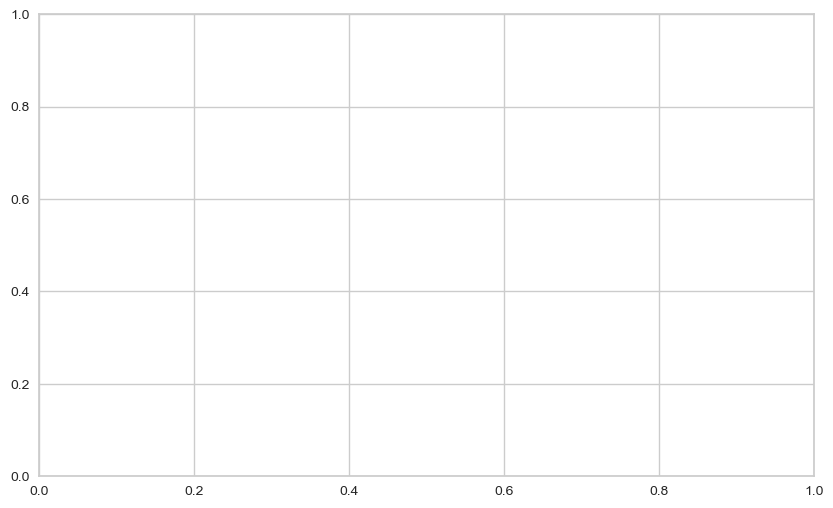

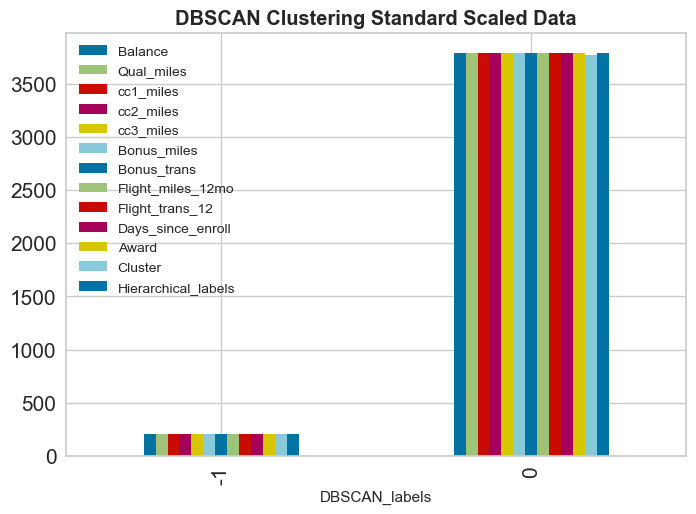

In [95]:
# Plotting barplot using groupby method to get visualize how many row no. in each cluster

fig, ax = plt.subplots(figsize=(10, 6))
data.groupby(['DBSCAN_labels']).count().plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering Standard Scaled Data',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('ID counts', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()